<a href="https://colab.research.google.com/github/taengbae/DNA/blob/main/%ED%95%AD%EA%B3%B5%EC%82%AC%EA%B3%A0%EA%B0%9D%EB%A7%8C%EC%A1%B1%EB%8F%84%EC%98%88%EC%B8%A1(DACON).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DACON 항공사 고객 만족도 예측 경진대회

#0. 패키지 및 데이터 불러오기

## 0.1 패키지 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plotly

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,397 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 44 kB/s 


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##0.2 데이터 불러오기

In [ ]:
test = '/content/drive/MyDrive/Colab Notebooks/data/항공사/test.csv'
train = '/content/drive/MyDrive/Colab Notebooks/data/항공사/train.csv'
submission = '/content/drive/MyDrive/Colab Notebooks/data/항공사/sample_submission.csv'

In [ ]:
train = pd.read_csv(train)
test = pd.read_csv(test)
subm = pd.read_csv(submission)

In [ ]:
test1 = '/content/drive/MyDrive/Colab Notebooks/data/항공사/test.csv'
train1 = '/content/drive/MyDrive/Colab Notebooks/data/항공사/train.csv'
submission1 = '/content/drive/MyDrive/Colab Notebooks/data/항공사/sample_submission.csv'

In [ ]:
train1 = pd.read_csv(train1)
test1 = pd.read_csv(test1)
subm1 = pd.read_csv(submission1)

In [ ]:
test2 = '/content/drive/MyDrive/Colab Notebooks/data/항공사/test.csv'
train2 = '/content/drive/MyDrive/Colab Notebooks/data/항공사/train.csv'
submission2 = '/content/drive/MyDrive/Colab Notebooks/data/항공사/sample_submission.csv'
train2 = pd.read_csv(train2)
test2 = pd.read_csv(test2)
subm2 = pd.read_csv(submission2)

#1. 데이터 전처리



*   id : 샘플 아이디
*   Gender : 성별
*   Customer Type : Disloyal 또는 Loyal 고객
*   Age : 나이
*   Type of Travel : Business 또는 Personal Travel
*   Class : 등급
*   Flight Distance : 비행 거리
*   Seat comfort : 좌석 만족도
*   Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
*   Food and drink : 식음료 만족도
*   Gate location : 게이트 위치 만족도
*   Inflight wifi service : 기내 와이파이 서비스 만족도
*   Inflight entertainment : 기내 엔터테인먼트 만족도
*   Online support : 온라인 지원 만족도
*   Ease of Online booking : 온라인 예매 편리성 만족도
*   On-board service : 탑승 서비스 만족도
*   Leg room service : Leg room 서비스 만족도
*   Baggage handling : 수하물 처리 만족도
*   Checkin service : 체크인 서비스 만족도
*   Cleanliness : 청결도 만족도
*   Online boarding : 온라인보딩 만족도
*   Departure Delay in Minutes : 출발 지연 시간
*   Arrival Delay in Minutes : 도착 지연 시간
*   target : 만족 여부



##1.1.(1) train 데이터 확인

In [ ]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [ ]:
train.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,866.169729,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,1.000000,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1500.500000,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,2250.250000,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,3000.000000,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


##1.1.(2) test 데이터 확인

In [ ]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,2,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,3,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,4,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,5,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 2000 non-null   int64  
 1   Gender                             2000 non-null   object 
 2   Customer Type                      2000 non-null   object 
 3   Age                                2000 non-null   int64  
 4   Type of Travel                     2000 non-null   object 
 5   Class                              2000 non-null   object 
 6   Flight Distance                    2000 non-null   int64  
 7   Seat comfort                       2000 non-null   int64  
 8   Departure/Arrival time convenient  2000 non-null   int64  
 9   Food and drink                     2000 non-null   int64  
 10  Gate location                      2000 non-null   int64  
 11  Inflight wifi service              2000 non-null   int64

In [ ]:
test.describe()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,39.604500,1989.231500,2.898500,3.046500,2.900000,2.98200,3.218000,3.42550,3.478500,3.450500,3.499000,3.49750,3.701000,3.353000,3.703000,3.33700,12.105000,12.936500
std,577.494589,15.061723,1046.961959,1.386059,1.509462,1.428993,1.31816,1.288529,1.32262,1.320382,1.289334,1.225459,1.27938,1.140723,1.260232,1.127576,1.30126,30.009636,30.843105
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.00000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000
25%,500.750000,27.000000,1379.250000,2.000000,2.000000,2.000000,2.00000,2.000000,2.00000,2.000000,2.000000,3.000000,2.00000,3.000000,3.000000,3.000000,2.00000,0.000000,0.000000
50%,1000.500000,40.000000,1961.500000,3.000000,3.000000,3.000000,3.00000,3.000000,4.00000,4.000000,4.000000,4.000000,4.00000,4.000000,3.000000,4.000000,3.50000,0.000000,0.000000
75%,1500.250000,51.000000,2564.250000,4.000000,4.000000,4.000000,4.00000,4.000000,4.00000,5.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,4.00000,10.000000,12.000000
max,2000.000000,85.000000,6571.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,448.000000,445.000000


##1.2.(1) train 결측값 확인 및 처리

In [ ]:
train.isnull().sum() #결측값 없음

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

##1.2.(1) test 결측값 확인 및 처리

In [ ]:
test.isnull().sum() #결측값 없음

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

##1.3 시각화와 상관관계 후 데이터 처리

다중공산성 발견(출발/도착 지역시간) -> 평균값으로 처리

In [ ]:
train2.drop('Departure Delay in Minutes', axis = 1, inplace = True)
train2.drop('Food and drink', axis = 1, inplace = True)
test2.drop('Departure Delay in Minutes', axis = 1, inplace = True)
test2.drop('Food and drink', axis = 1, inplace = True)

In [ ]:
train2.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,target
0,1.0,Female,disloyal Customer,22.0,Business travel,Eco,1599.0,3.0,0.0,3.0,4.0,3.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,0.0,0.0
1,2.0,Female,Loyal Customer,37.0,Business travel,Business,2810.0,2.0,4.0,4.0,1.0,4.0,3.0,5.0,5.0,4.0,2.0,1.0,5.0,2.0,18.0,0.0
2,3.0,Male,Loyal Customer,46.0,Business travel,Business,2622.0,1.0,1.0,1.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,0.0,1.0
3,4.0,Female,disloyal Customer,24.0,Business travel,Eco,2348.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,3.0,2.0,0.0
4,5.0,Female,Loyal Customer,58.0,Business travel,Business,105.0,3.0,3.0,3.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,0.0,1.0


In [ ]:
train2.loc['Arrival Delay in Minutes'] = train2['Arrival Delay in Minutes'].mean()
train2.loc['Flight Distance'] = train2['Flight Distance'].mean()
train2.loc['Checkin service'] = train2['Checkin service'].mean()

In [ ]:
#train2['Delay in Minutes'] = (train2['Departure Delay in Minutes'] + train2['Arrival Delay in Minutes']) / 2
#test2['Delay in Minutes'] = (test2['Departure Delay in Minutes'] + test2['Arrival Delay in Minutes']) / 2

#drop
#train2 = train2.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)
#test2 = test2.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'], axis=1)

#2. 시각화

##2.1 target 변수

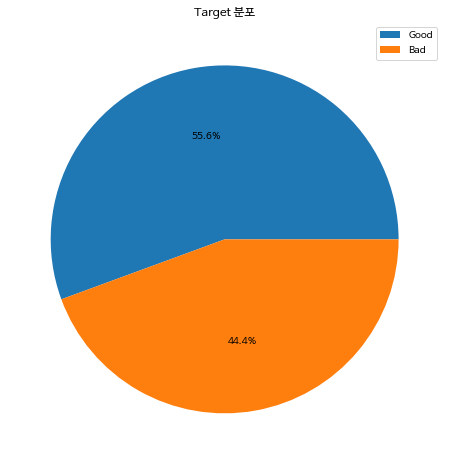

In [ ]:
#target 분포 파이차트

fig = plt.figure(figsize=(16,8))
plt.pie(train['target'].value_counts(), autopct='%1.1f%%')
plt.title('Target 분포')
plt.legend(['Good', 'Bad'], loc = "upper right")
plt.show()

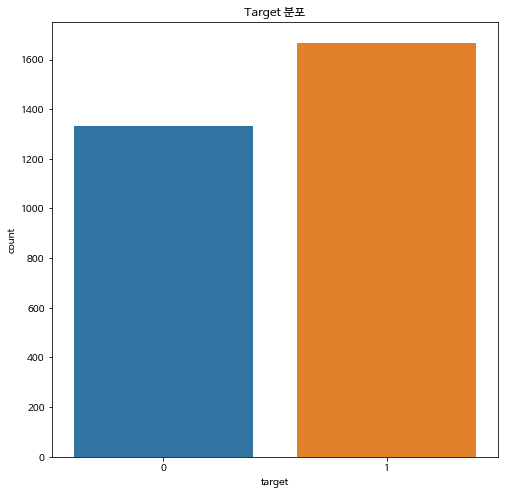

In [ ]:
#target 분포 countplot

fig = plt.figure(figsize=(8,8))
plt.title('Target 분포')
sns.countplot(x=train['target'])

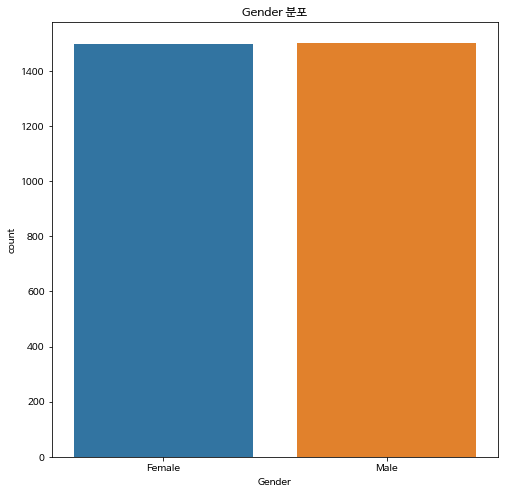

In [ ]:
#Gender 분포 countplot

fig = plt.figure(figsize=(8,8))
plt.title('Gender 분포')
sns.countplot(x=train['Gender'])

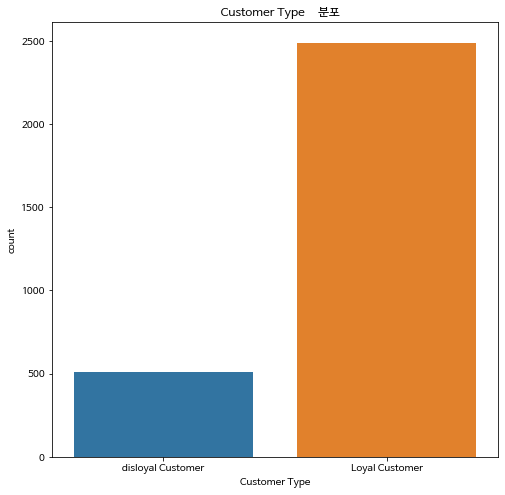

In [ ]:
#	Customer Type	 분포 countplot

fig = plt.figure(figsize=(8,8))
plt.title('	Customer Type	 분포')
sns.countplot(x=train['Customer Type'])

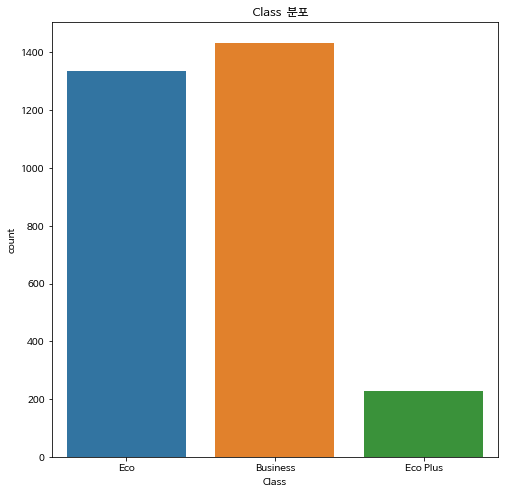

In [ ]:
#	Class 분포 countplot

fig = plt.figure(figsize=(8,8))
plt.title('	Class  분포')
sns.countplot(x=train['Class'])

##2.2.(1) 범주형 변수와 target countplot

In [ ]:
train0 = train[train['target']==0]
train1 = train[train['target']==1]

In [ ]:
def target_plot(var):
  f, ax = plt.subplots(1, 3, figsize=(16, 6))
  sns.countplot(x=var, data=train, ax = ax[0])
  ax[0].set_title('	전체 target ')

  sns.countplot(x=var, data=train0, ax = ax[1])
  ax[1].set_title(' target = 0 ')

  sns.countplot(x=var, data=train1, ax = ax[2])
  ax[2].set_title('	target = 1')

  plt.show()

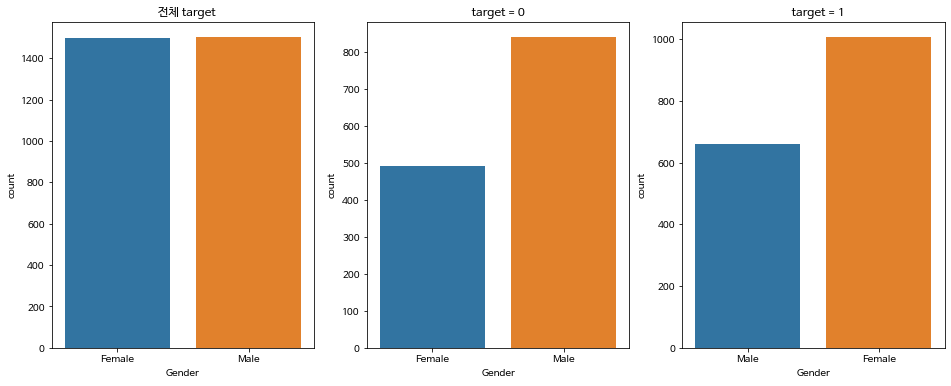

In [ ]:
target_plot('Gender')

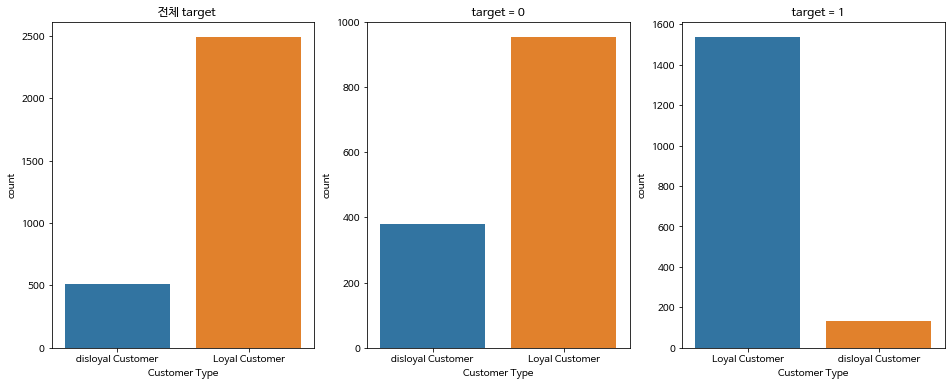

In [ ]:
target_plot('Customer Type')

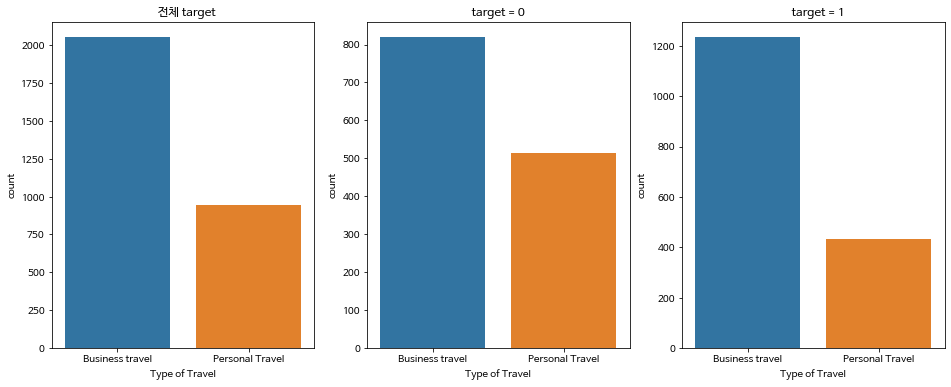

In [ ]:
target_plot('Type of Travel')

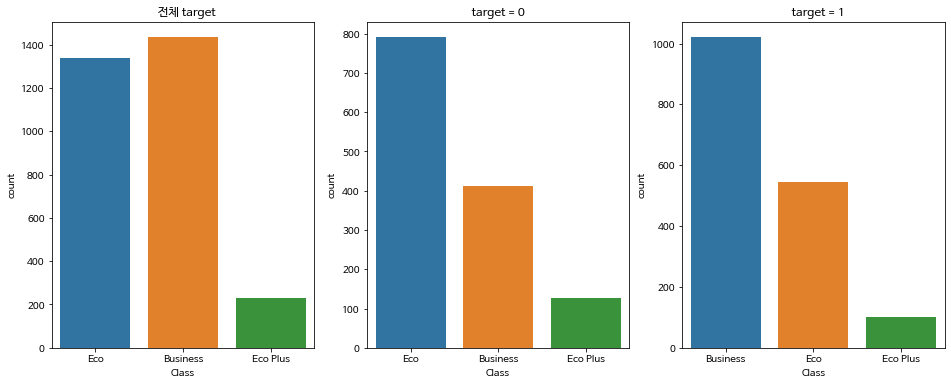

In [ ]:
target_plot('Class')

##2.2.(2) 수치형 변수와 target countplot

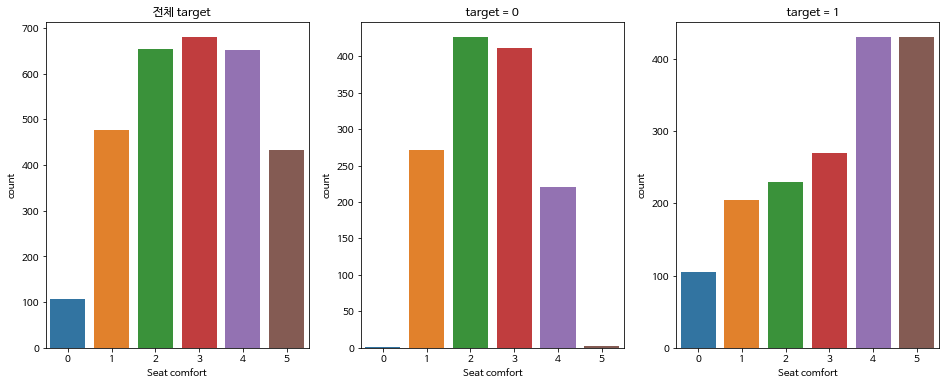

In [ ]:
target_plot('Seat comfort')

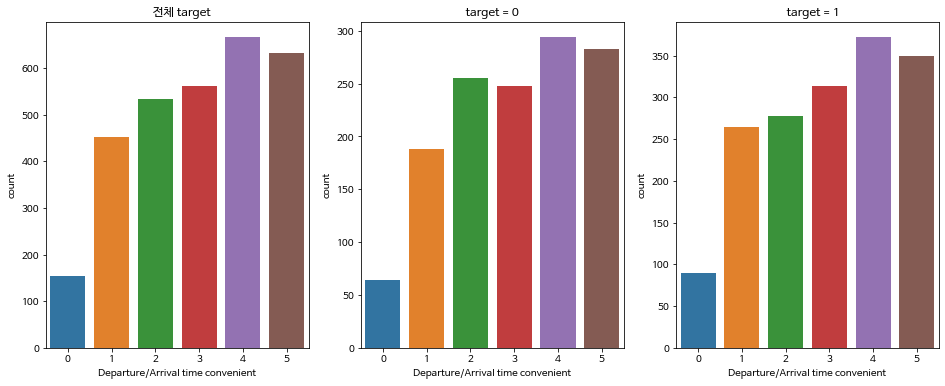

In [ ]:
target_plot('Departure/Arrival time convenient')

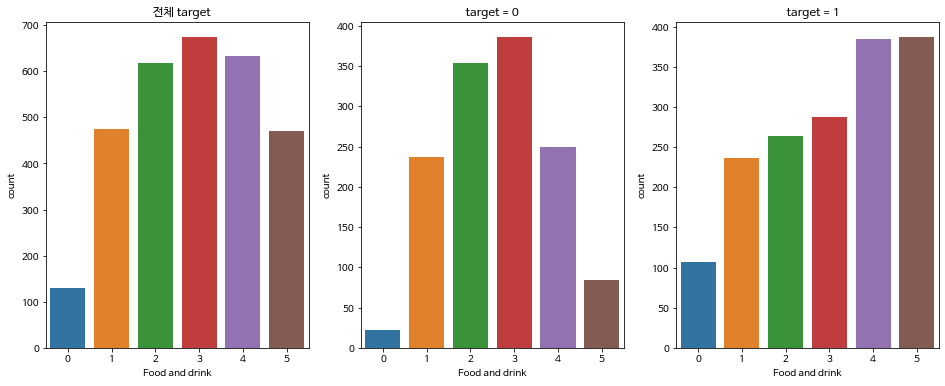

In [ ]:
target_plot('Food and drink')

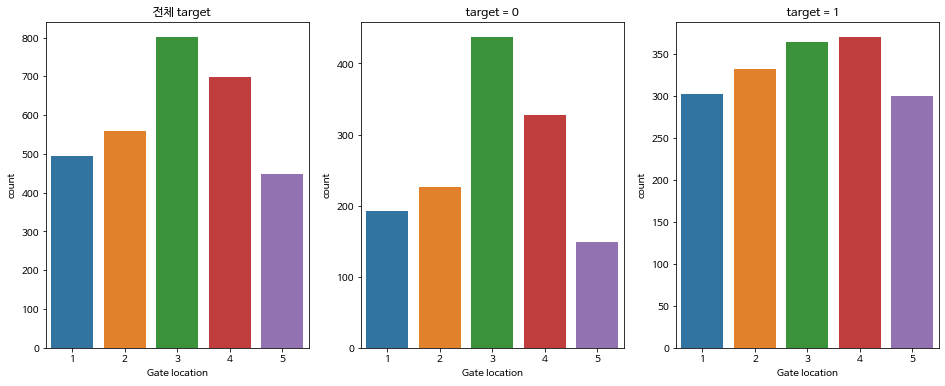

In [ ]:
target_plot('Gate location')

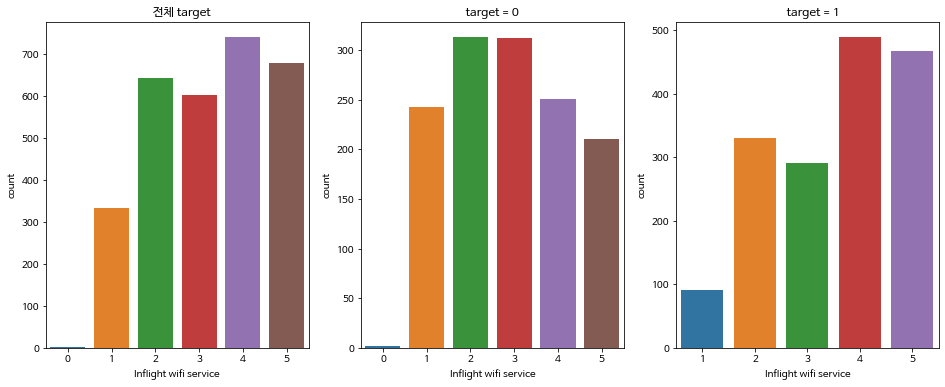

In [ ]:
target_plot('Inflight wifi service')

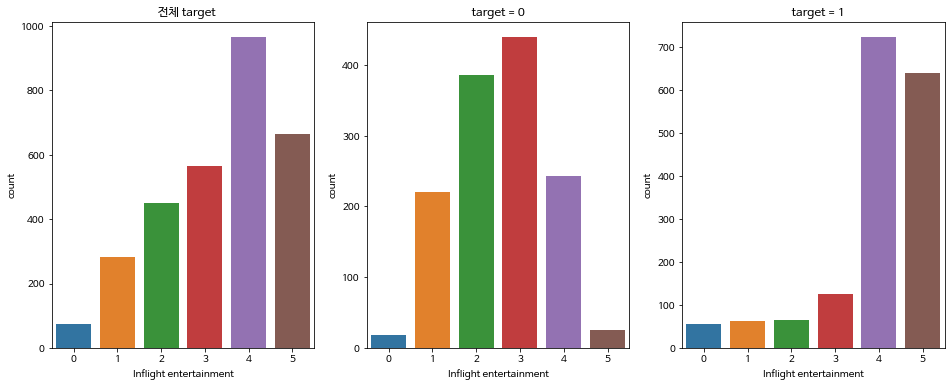

In [ ]:
target_plot('Inflight entertainment')

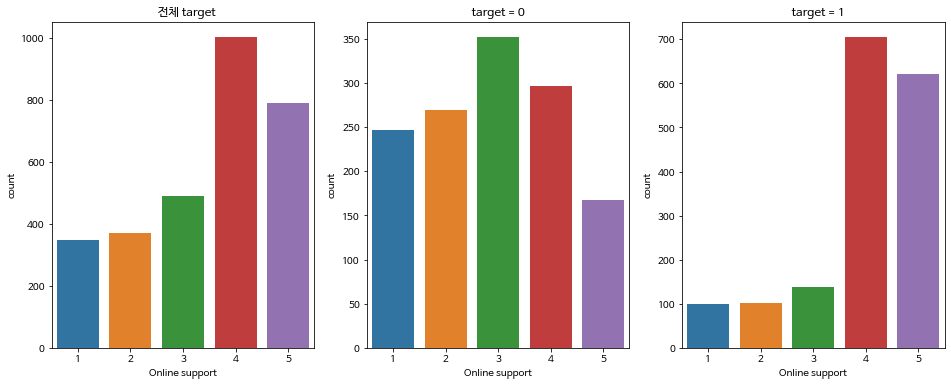

In [ ]:
target_plot('Online support')

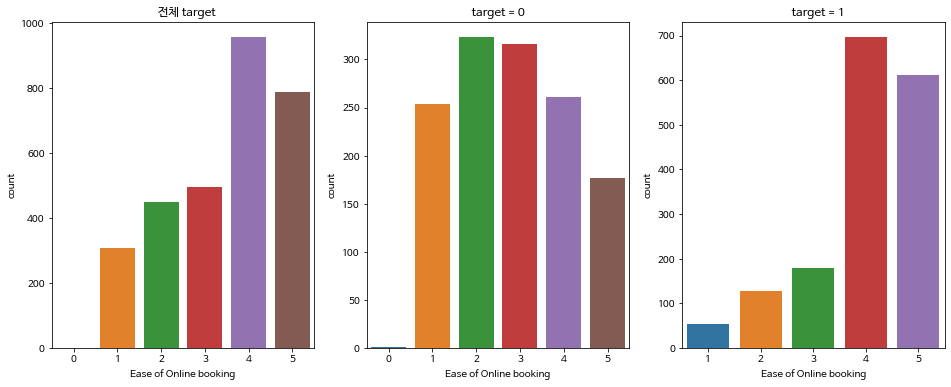

In [ ]:
target_plot('Ease of Online booking')

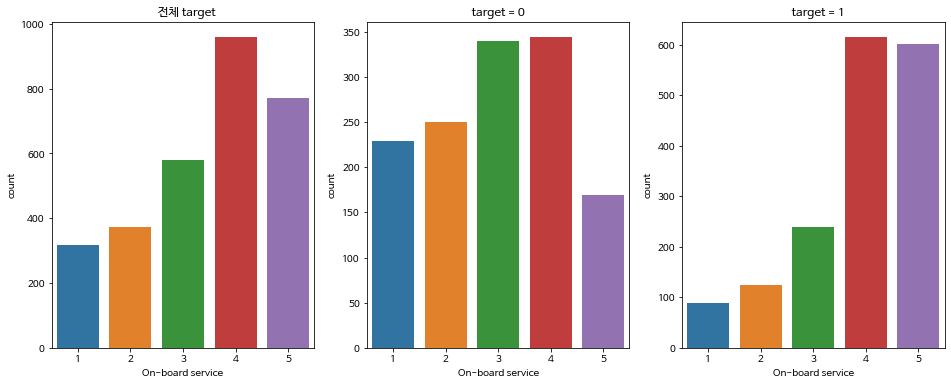

In [ ]:
target_plot('On-board service')

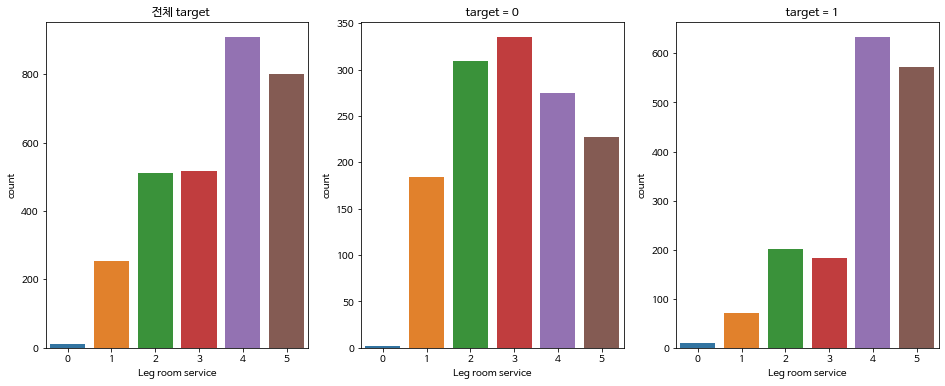

In [ ]:
target_plot('Leg room service')

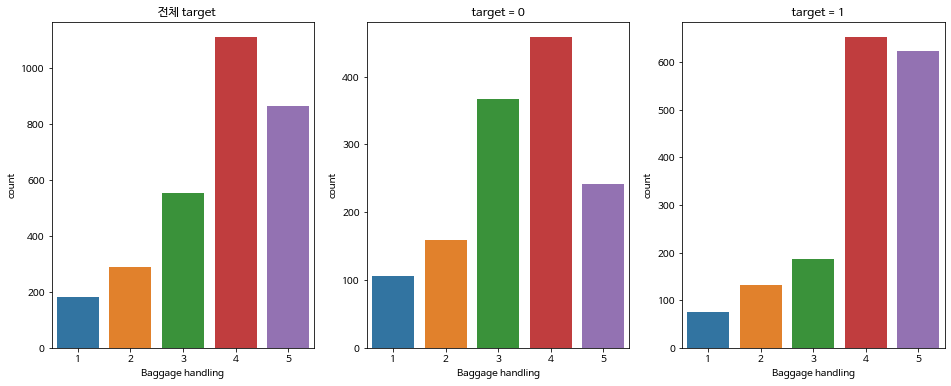

In [ ]:
target_plot('Baggage handling')

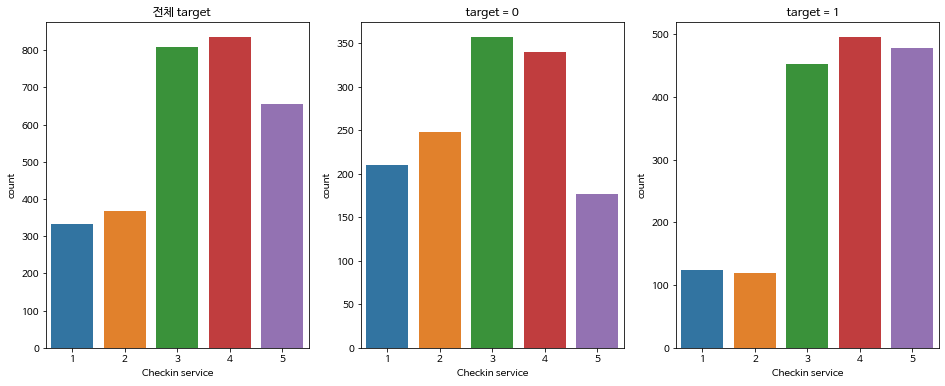

In [ ]:
target_plot('Checkin service')

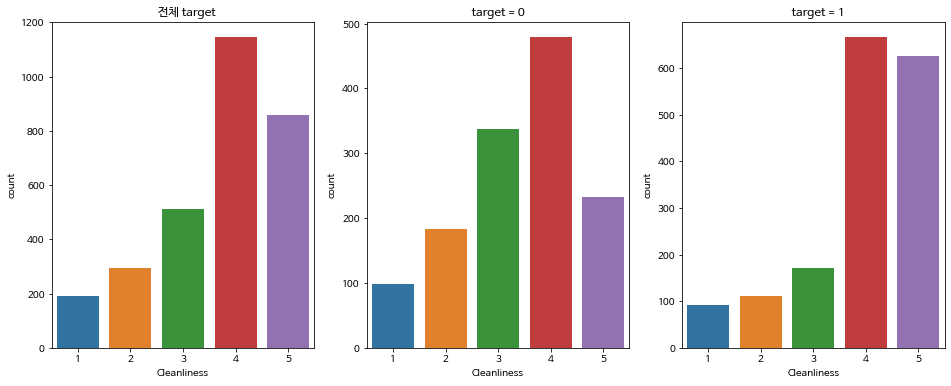

In [ ]:
target_plot('Cleanliness')

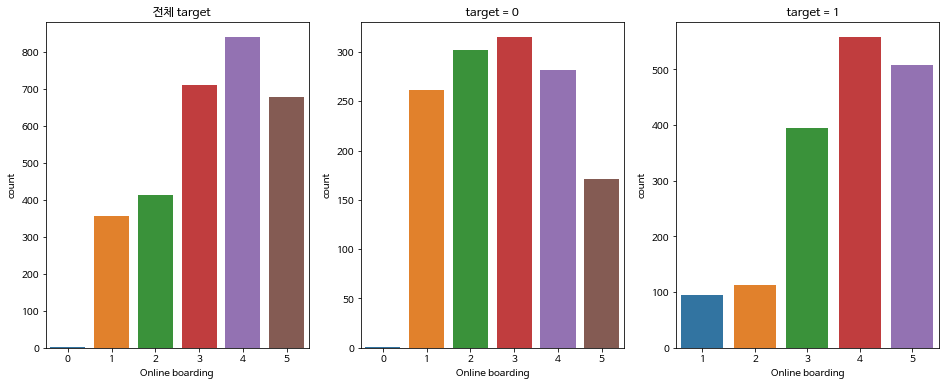

In [ ]:
target_plot('Online boarding')

##2.3 연속형 변수와 target histplot

In [ ]:
def target_hist(var):
  f, ax = plt.subplots(1, 3, figsize=(25, 10))
  sns.histplot(x=var, data=train, ax = ax[0], kde=True)
  ax[0].set_title('	전체 target ')

  sns.histplot(x=var, data=train0, ax = ax[1], kde=True)
  ax[1].set_title(' target = 0 ')

  sns.histplot(x=var, data=train1, ax = ax[2], kde=True)
  ax[2].set_title('	target = 1')

  plt.show()

Age : 나이

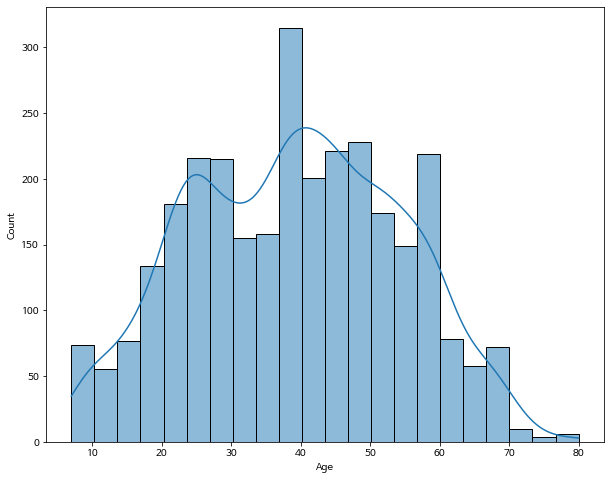

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.histplot(x=train['Age'], kde=True)

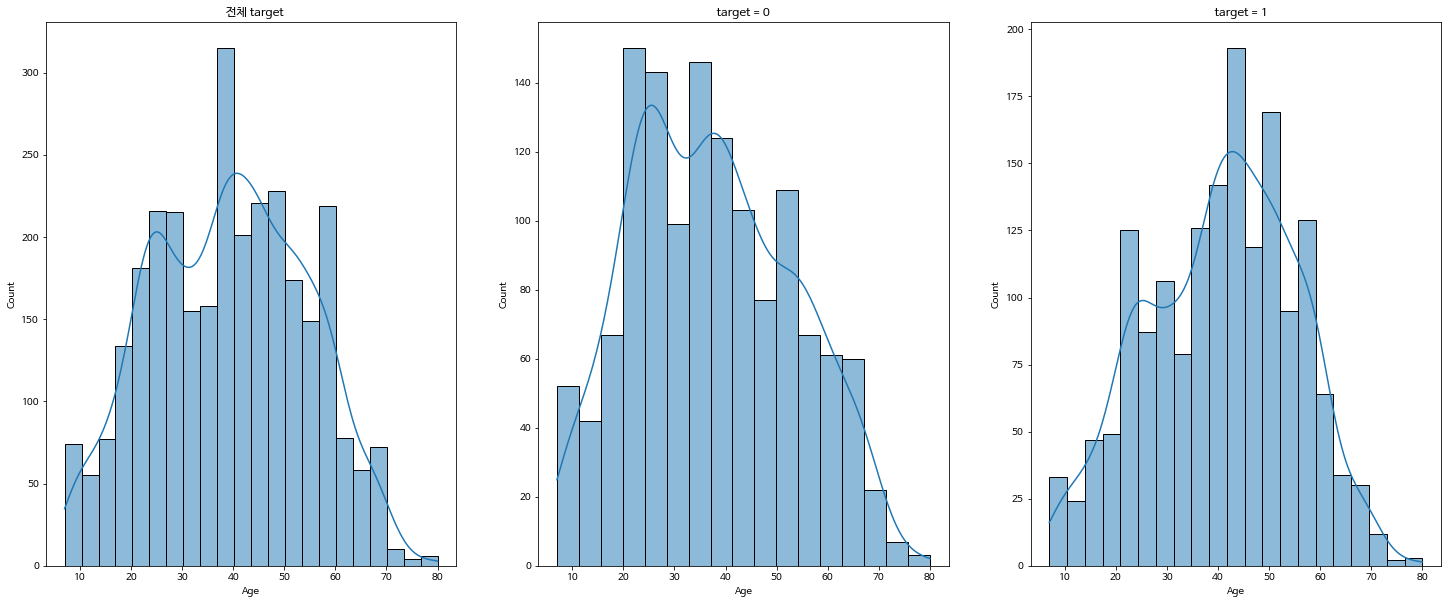

In [ ]:
target_hist('Age')

Flight Distance : 비행 거리

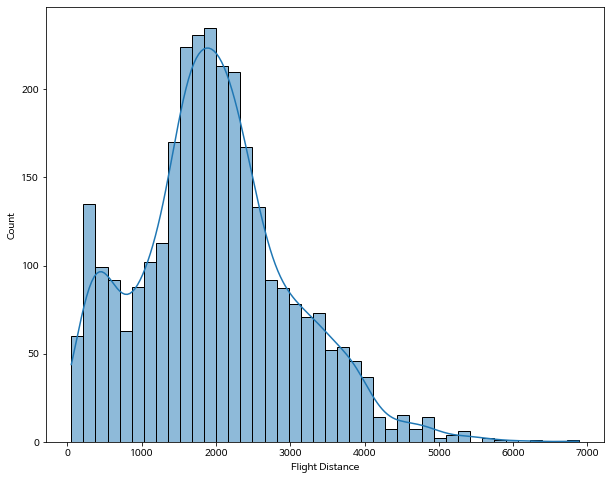

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.histplot(x=train['Flight Distance'], kde=True)

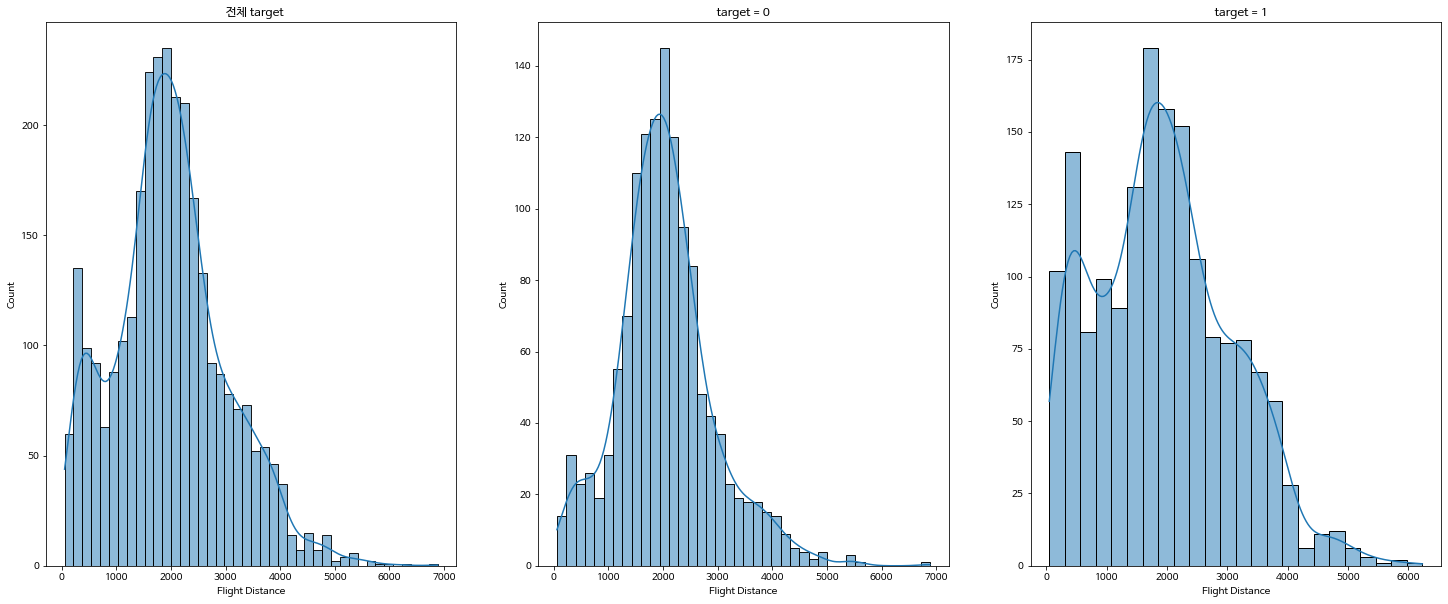

In [ ]:
target_hist('Flight Distance')

Departure Delay in Minutes : 출발 지연 시간

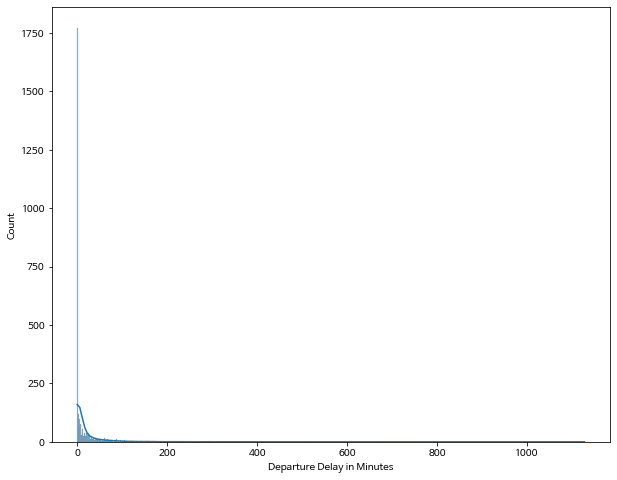

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.histplot(x=train['Departure Delay in Minutes'], kde=True)

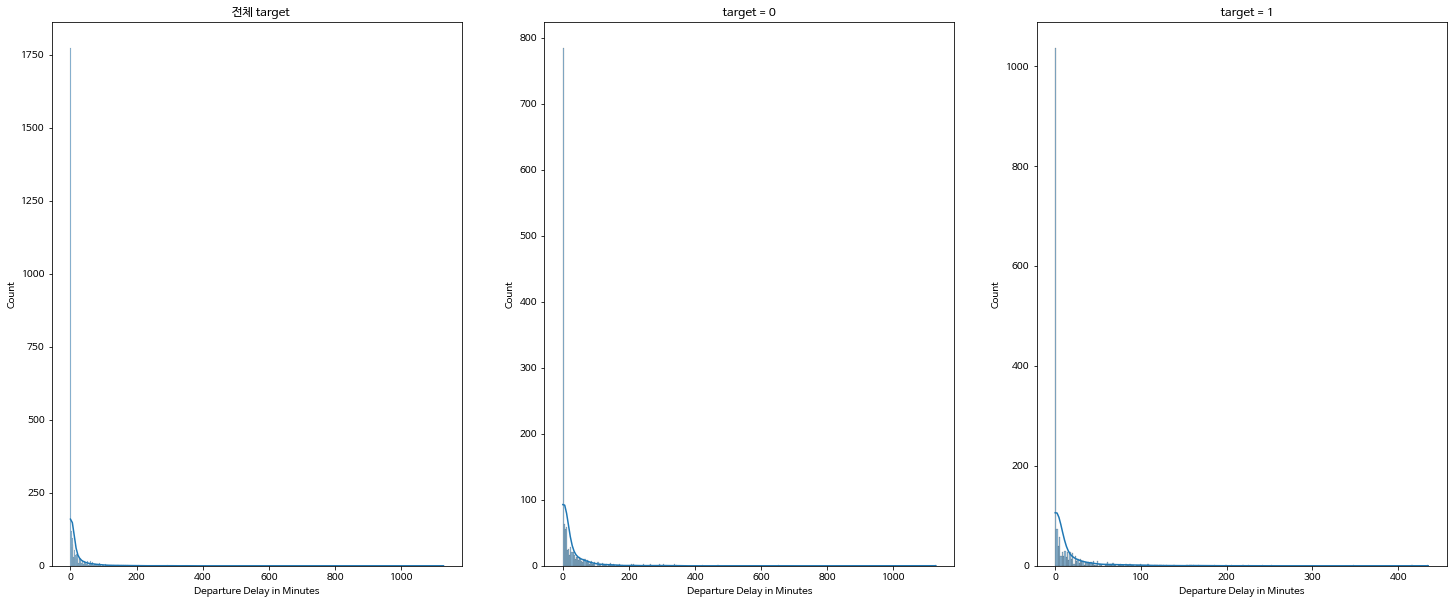

In [ ]:
target_hist('Departure Delay in Minutes')


Arrival Delay in Minutes : 도착 지연 시간

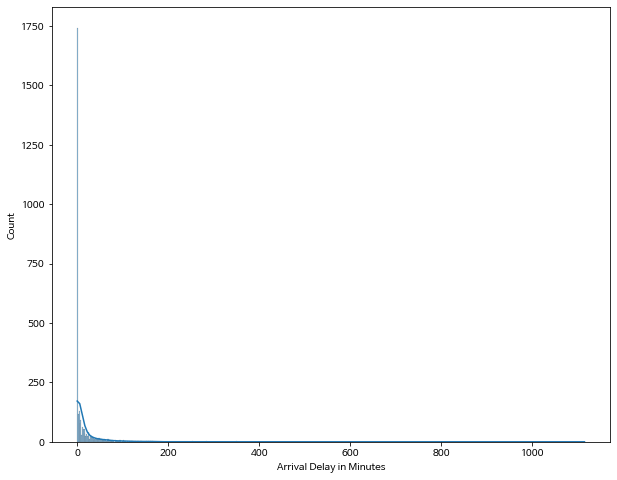

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.histplot(x=train['Arrival Delay in Minutes'], kde=True)

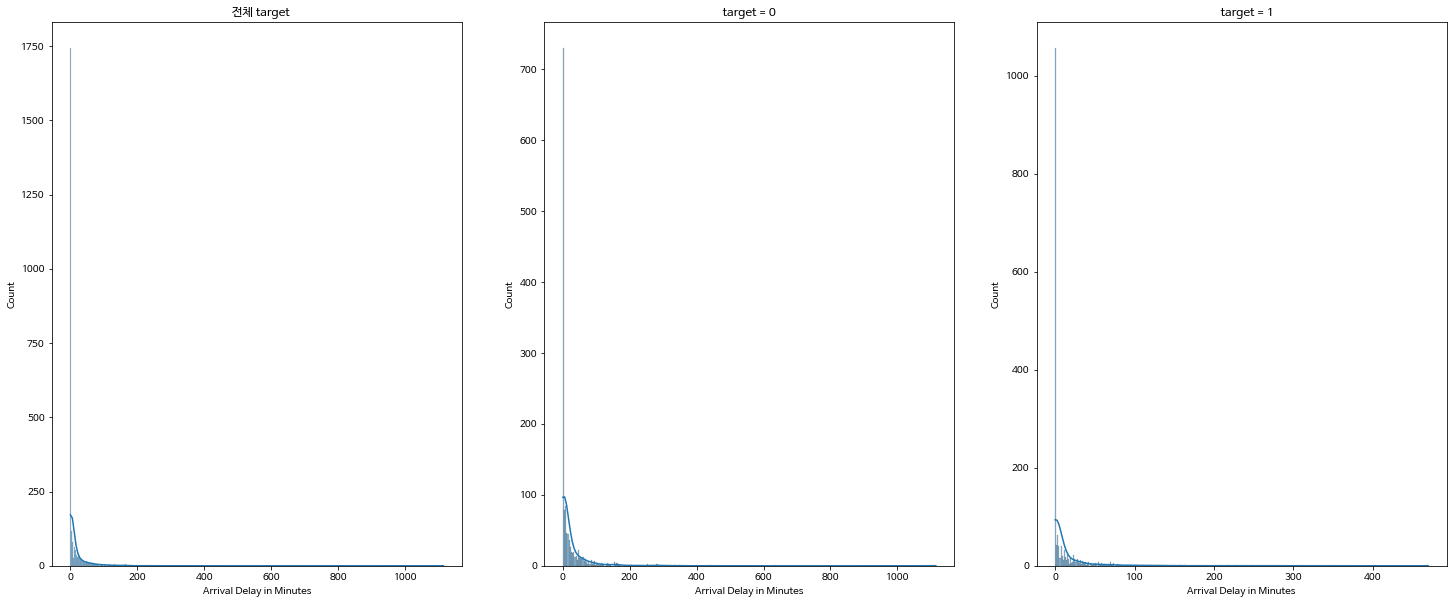

In [ ]:
target_hist('Arrival Delay in Minutes')

##2.4 연속형 변수 boxplot

Age : 나이

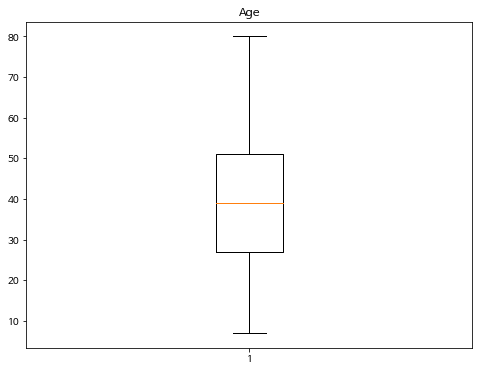

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.boxplot(train['Age'])
plt.title("Age")
plt.show()

Flight Distance : 비행 거리

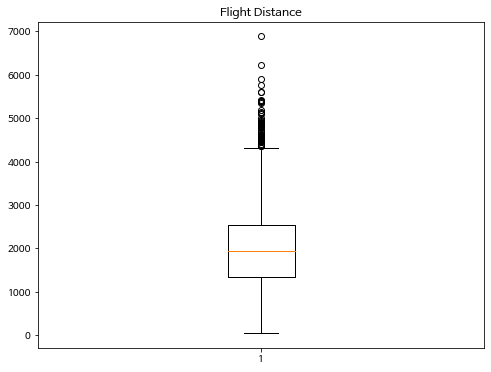

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.boxplot(train['Flight Distance'])
plt.title("Flight Distance")
plt.show()

Departure Delay in Minutes : 출발 지연 시간

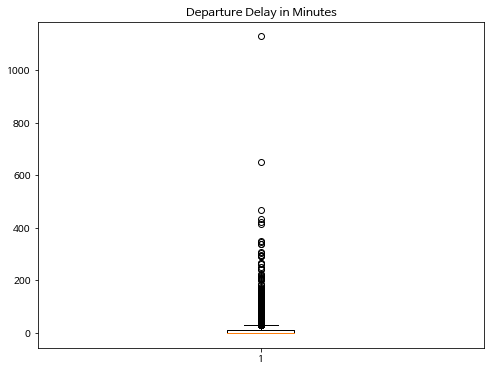

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.boxplot(train['Departure Delay in Minutes'])
plt.title("Departure Delay in Minutes")
plt.show()

Arrival Delay in Minutes : 도착 지연 시간

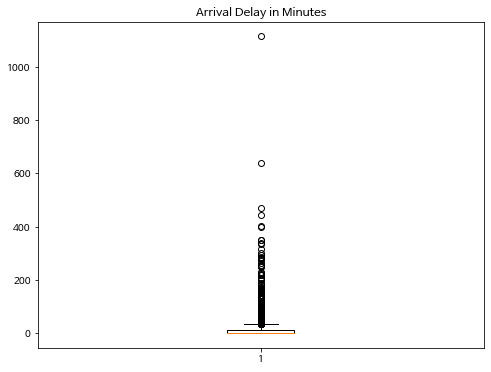

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.boxplot(train['Arrival Delay in Minutes'])
plt.title("Arrival Delay in Minutes")
plt.show()

#3. 상관관계

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


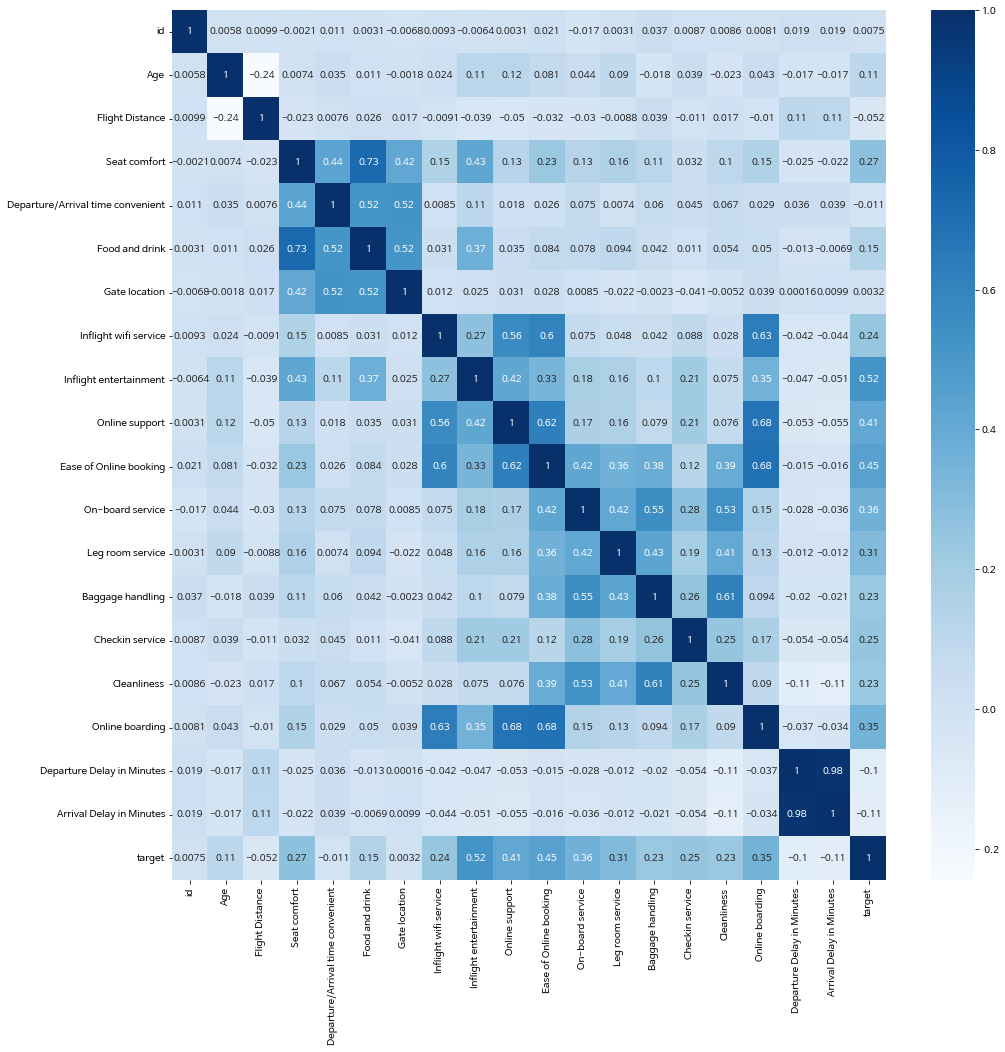

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(), annot=True, cmap = 'Blues')

In [ ]:
train_ = train.rename(columns={'Customer Type':'Customer_Type'})

In [ ]:
train_ = train_.rename(columns={'Type of Travel':'Type_of_Travel'})

In [ ]:
lm_model = smf.ols(formula = "target ~ Gender", data = train).fit()
anova_lm(lm_model)

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,40.420057,40.420057,173.070816,1.800580e-38
Residual,2998.0,700.171943,0.233546,NaN,NaN


In [ ]:
lm_model = smf.ols(formula = "target ~ Customer_Type", data = train_).fit()
anova_lm(lm_model)

,df,sum_sq,mean_sq,F,PR(>F)
Customer_Type,1.0,54.578959,54.578959,238.51984,7.784721e-52
Residual,2998.0,686.013041,0.228824,NaN,NaN


In [ ]:
lm_model = smf.ols(formula = "target ~ Type_of_Travel", data = train_).fit()
anova_lm(lm_model)

,df,sum_sq,mean_sq,F,PR(>F)
Type_of_Travel,1.0,13.211929,13.211929,54.454836,2.049041e-13
Residual,2998.0,727.380071,0.242622,NaN,NaN


In [ ]:
lm_model = smf.ols(formula = "target ~ Class", data = train).fit()
anova_lm(lm_model)

,df,sum_sq,mean_sq,F,PR(>F)
Class,2.0,67.057978,33.528989,149.19273,1.708488e-62
Residual,2997.0,673.534022,0.224736,NaN,NaN


#4. 범주형 변수 인코딩

##4.1 라벨 인코딩

In [ ]:
#train

le = LabelEncoder()

train["Gender"] = le.fit_transform(train["Gender"])
train["Customer Type"] = le.fit_transform(train["Customer Type"])
train["Type of Travel"] = le.fit_transform(train["Type of Travel"])
train["Class"] = le.fit_transform(train["Class"])

train.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,0,1,22,0,1,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,0,0,37,0,0,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,1,0,46,0,0,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,0,1,24,0,1,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,0,0,58,0,0,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


In [ ]:
#test

le = LabelEncoder()

test["Gender"] = le.fit_transform(test["Gender"])
test["Customer Type"] = le.fit_transform(test["Customer Type"])
test["Type of Travel"] = le.fit_transform(test["Type of Travel"])
test["Class"] = le.fit_transform(test["Class"])

test.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,61,1,1,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,2,0,1,27,0,0,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,3,0,0,52,0,0,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,4,1,0,54,0,0,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,5,0,0,41,0,1,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0


##4.2 원핫 인코딩

In [ ]:
train1 = pd.get_dummies(data = train1, columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class'])
test1 = pd.get_dummies(data = test1, columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [ ]:
train1.head()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,22,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0,1,0,0,1,1,0,0,1,0
1,2,37,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0,1,0,1,0,1,0,1,0,0
2,3,46,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1,0,1,1,0,1,0,1,0,0
3,4,24,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0,1,0,0,1,1,0,0,1,0
4,5,58,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1,1,0,1,0,1,0,1,0,0


## 테스트

In [ ]:
#test

le = LabelEncoder()

test2["Gender"] = le.fit_transform(test2["Gender"])
test2["Customer Type"] = le.fit_transform(test2["Customer Type"])
test2["Type of Travel"] = le.fit_transform(test2["Type of Travel"])
test2["Class"] = le.fit_transform(test2["Class"])

test2.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes
0,1,0,0,61,1,1,2037,1,1,1,3,5,5,5,5,5,5,3,5,3,58.0
1,2,0,1,27,0,0,1846,1,1,4,1,1,1,1,3,4,5,4,4,1,0.0
2,3,0,0,52,0,0,1622,4,4,4,4,3,4,5,5,5,5,4,5,3,0.0
3,4,1,0,54,0,0,3534,4,4,4,5,4,5,2,2,2,2,5,2,1,0.0
4,5,0,0,41,0,1,1471,4,3,3,4,4,4,4,3,1,2,5,4,4,0.0


#5. 모델링

##5.1 train/test 나누기

라벨인코딩

In [ ]:
#target 변수 분리

train_target = train['target'].values
train_feature = train.drop('target', axis=1).values

In [ ]:
# train/test 데이터 분리

x_train, x_test, y_train, y_test = train_test_split(train_feature, train_target, test_size=0.2, random_state=42)

원핫인코딩

In [ ]:
#target 변수 분리

train_target_o = train1['target'].values
train_feature_o = train1.drop('target', axis=1).values

In [ ]:
# train/test 데이터 분리

train_x, test_x, train_y, test_y = train_test_split(train_feature_o, train_target_o, test_size=0.2, random_state=42)

데이터 정규화

In [ ]:
# 데이터 정규화

scaler = StandardScaler()
scaler.fit(x_train)
x_scaled_train = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [ ]:
# 데이터 정규화

scaler = StandardScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)
scaled_test_x = scaler.transform(test_x)

###평균처리

평균처리 + 정규화

In [ ]:
#target 변수 분리

train_target = train2['target'].values
train_feature = train2.drop('target', axis=1).values

In [ ]:
# train/test 데이터 분리

xtrain, xtest, ytrain, ytest = train_test_split(train_feature, train_target, test_size=0.2, random_state=42)

##5.2 로지스틱 회귀

정규화 전

In [ ]:
model_ = LogisticRegression()
model_.fit(x_train,y_train)

train_pred1 = model_.predict(x_train)
test_pred1 = model_.predict(x_test)

rmse1 = mean_squared_error(y_train, train_pred1)**0.5
rmse2 = mean_squared_error(y_test, test_pred1)**0.5

print('[로지스틱 회귀] train score :', rmse1, 'test score :', rmse2)

[로지스틱 회귀] train score : 0.4890466917040403 test score : 0.47958315233127197


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# (C=99) 하이퍼 파라미터 적용

model_C = LogisticRegression(C=99)
model_C.fit(x_train,y_train)

train_pred = model_C.predict(x_train)
test_pred = model_C.predict(x_test)

rmse1 = mean_squared_error(y_train, train_pred)**0.5
rmse2 = mean_squared_error(y_test, test_pred)**0.5

print('[로지스틱 회귀 (C=99)] train score :', rmse1, 'test score :', rmse2)

[로지스틱 회귀 (C=99)] train score : 0.48733971724044817 test score : 0.4813176359397884


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


정규화 후

In [ ]:
# 데이터 정규화

scaler = StandardScaler()
scaler.fit(x_train)
x_scaled_train = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [ ]:
model_ = LogisticRegression()
model_.fit(x_scaled_train,y_train)

train_pred1 = model_.predict(x_scaled_train)
test_pred1 = model_.predict(x_scaled_test)

rmse1 = mean_squared_error(y_train, train_pred1)**0.5
rmse2 = mean_squared_error(y_test, test_pred1)**0.5

print('[로지스틱 회귀] train score :', rmse1, 'test score :', rmse2)

[로지스틱 회귀] train score : 0.4025957443060387 test score : 0.37859388972001823


In [ ]:
# (C=99) 하이퍼 파라미터 적용

model_C = LogisticRegression(C=99)
model_C.fit(x_scaled_train,y_train)

train_pred = model_C.predict(x_scaled_train)
test_pred = model_C.predict(x_scaled_test)

rmse1 = mean_squared_error(y_train, train_pred)**0.5
rmse2 = mean_squared_error(y_test, test_pred)**0.5

print('[로지스틱 회귀 (C=99)] train score :', rmse1, 'test score :', rmse2)

[로지스틱 회귀 (C=99)] train score : 0.4025957443060387 test score : 0.37859388972001823


##5.3 CATboost

1) Catboost 란?

Catboost란 Yandex에서 개발된 오픈 소스 Machine Learning이다. 이 기술은 다양한 데이터 형태를 활용하여 기업이 직면한 문제들을 해결하는데 도움을 준다. 특히 분류 정확성에서 높은 점수를 제공한다.

Catboost는 Category와 Boosting을 합쳐서 만들어진 이름이다.
여기에서 Boost는 Gradient boosting machine learnin algorithm에서 온 말인데 Gradient boosting은 추천 시스템, 예측 등 다양한 분야에서 활용되어지는 강력한 방법이고 Deep Learning과 달리 적은 데이터로도 좋은 결과를 얻을 수 있는 효율적인 방법이다.

 2) 편리성

- Category features를 사용하기 위해서는 One-Hot-Encoding등 데이터를 전처리할 필요가 있었지만 Catboost에서는 사용자가 다른 작업을 하지 않아도 자동으로 이를 변환하여 사용한다.
- 빠른 예측
:학습 시간이 다른 GBDT에 보다는 더 오래 걸리는 대신에 예측 시간이 13-16배 정도 더 빠르다.

### 방법1

In [ ]:
import catboost as cb

In [ ]:
feature = list(train.columns.difference(['target']))

model_cb = cb.CatBoostClassifier()

model_cb.fit(train[feature], train['target'])

y_pred = model_cb.predict(train[feature])

Learning rate set to 0.016469
0:	learn: 0.6769841	total: 49.8ms	remaining: 49.8s
1:	learn: 0.6598595	total: 52.9ms	remaining: 26.4s
2:	learn: 0.6461611	total: 55.7ms	remaining: 18.5s
3:	learn: 0.6317478	total: 59ms	remaining: 14.7s
4:	learn: 0.6194160	total: 64ms	remaining: 12.7s
5:	learn: 0.6064752	total: 66.9ms	remaining: 11.1s
6:	learn: 0.5930108	total: 69.6ms	remaining: 9.87s
7:	learn: 0.5802588	total: 72.2ms	remaining: 8.96s
8:	learn: 0.5691448	total: 75.2ms	remaining: 8.28s
9:	learn: 0.5589799	total: 78ms	remaining: 7.73s
10:	learn: 0.5476919	total: 81ms	remaining: 7.28s
11:	learn: 0.5382304	total: 84.1ms	remaining: 6.93s
12:	learn: 0.5277601	total: 87.1ms	remaining: 6.61s
13:	learn: 0.5190519	total: 89.9ms	remaining: 6.33s
14:	learn: 0.5092900	total: 92.6ms	remaining: 6.08s
15:	learn: 0.5001774	total: 95.3ms	remaining: 5.86s
16:	learn: 0.4933125	total: 98.1ms	remaining: 5.67s
17:	learn: 0.4839306	total: 101ms	remaining: 5.5s
18:	learn: 0.4747508	total: 104ms	remaining: 5.36s
19:

### 방법2

In [ ]:
model_CB=CatBoostClassifier()
model_CB.fit(x_train,y_train)

train_pred = model_CB.predict(x_train)
test_pred = model_CB.predict(x_test)

rmse1 = mean_squared_error(y_train, train_pred)**0.5
rmse2 = mean_squared_error(y_test, test_pred)**0.5

print('[로지스틱 회귀 (C=99)] train score :', rmse1, 'test score :', rmse2)

Learning rate set to 0.014972
0:	learn: 0.6789944	total: 6.94ms	remaining: 6.94s
1:	learn: 0.6658188	total: 12.7ms	remaining: 6.33s
2:	learn: 0.6521620	total: 19.4ms	remaining: 6.46s
3:	learn: 0.6387368	total: 23.1ms	remaining: 5.75s
4:	learn: 0.6253002	total: 26.3ms	remaining: 5.24s
5:	learn: 0.6141805	total: 28.4ms	remaining: 4.71s
6:	learn: 0.6040310	total: 30.5ms	remaining: 4.32s
7:	learn: 0.5927865	total: 33.4ms	remaining: 4.14s
8:	learn: 0.5825858	total: 36ms	remaining: 3.97s
9:	learn: 0.5736695	total: 37.7ms	remaining: 3.73s
10:	learn: 0.5625166	total: 39.8ms	remaining: 3.58s
11:	learn: 0.5533330	total: 57.8ms	remaining: 4.76s
12:	learn: 0.5431477	total: 63ms	remaining: 4.78s
13:	learn: 0.5346492	total: 70.6ms	remaining: 4.97s
14:	learn: 0.5253310	total: 78.5ms	remaining: 5.16s
15:	learn: 0.5184599	total: 85.5ms	remaining: 5.26s
16:	learn: 0.5098553	total: 93.4ms	remaining: 5.4s
17:	learn: 0.5021038	total: 101ms	remaining: 5.53s
18:	learn: 0.4938567	total: 109ms	remaining: 5.65s

정규화하면? -> 차이 X

### 방법3.(1) 라벨인코딩 data


GridSearchCV란?

GridSearchCV 를 통해 우리는 교차 검증과 하이퍼 파라미터 튜닝을 동시에 수행할 수 있습니다. 하이퍼 파라미터는 머신러닝 알고리즘 중 중요하다고 생각되는 구성 요소이며 이 값을 조정하는 튜닝 과정을 통해 알고리즘의 예측 성능을 개선할 수 있다.

교차 검증 기반으로 지정된 파라미터들을 순차적으로 적용해보며 최적의 파라미터 값을 찾아준다. 이 때문에 최적의 파라미터를 알 수 있으나 시간이 오래 걸린다.

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [6, 8, 10],
             'learning_rate' : [0.05, 0.1, 0.2],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=5, n_jobs=-1)
grid_cb.fit(x_train, y_train)

0:	learn: 0.6051852	total: 3.53ms	remaining: 703ms
1:	learn: 0.5380507	total: 5.8ms	remaining: 574ms
2:	learn: 0.4865872	total: 8.07ms	remaining: 530ms
3:	learn: 0.4411091	total: 10.3ms	remaining: 503ms
4:	learn: 0.4008724	total: 12.5ms	remaining: 486ms
5:	learn: 0.3754271	total: 14.6ms	remaining: 474ms
6:	learn: 0.3549597	total: 17.4ms	remaining: 479ms
7:	learn: 0.3374513	total: 19.7ms	remaining: 474ms
8:	learn: 0.3218547	total: 22.7ms	remaining: 481ms
9:	learn: 0.3078408	total: 25.3ms	remaining: 480ms
10:	learn: 0.2978779	total: 27.8ms	remaining: 477ms
11:	learn: 0.2838686	total: 30.1ms	remaining: 472ms
12:	learn: 0.2680288	total: 32.8ms	remaining: 471ms
13:	learn: 0.2600017	total: 35.3ms	remaining: 469ms
14:	learn: 0.2475311	total: 37.8ms	remaining: 466ms
15:	learn: 0.2388550	total: 40.1ms	remaining: 461ms
16:	learn: 0.2285054	total: 42.5ms	remaining: 457ms
17:	learn: 0.2237224	total: 44.9ms	remaining: 454ms
18:	learn: 0.2185663	total: 47.5ms	remaining: 452ms
19:	learn: 0.2159518	to

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc377940390>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 150, 200],
                         'learning_rate': [0.05, 0.1, 0.2]},
             scoring='accuracy')

In [ ]:
print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

최적 하이퍼 파라미터 :  {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}
최고 예측 정확도 : 0.926250


### 방법3.(2) 원핫인코딩 data

In [ ]:
grid_cb.fit(train_x, train_y)

0:	learn: 0.6094743	total: 4.94ms	remaining: 983ms
1:	learn: 0.5345397	total: 12.1ms	remaining: 1.2s
2:	learn: 0.4650145	total: 18.5ms	remaining: 1.21s
3:	learn: 0.4264051	total: 24.8ms	remaining: 1.22s
4:	learn: 0.3871916	total: 31.2ms	remaining: 1.22s
5:	learn: 0.3516605	total: 37.2ms	remaining: 1.2s
6:	learn: 0.3227127	total: 44.6ms	remaining: 1.23s
7:	learn: 0.2995708	total: 50.8ms	remaining: 1.22s
8:	learn: 0.2859013	total: 57ms	remaining: 1.21s
9:	learn: 0.2667417	total: 63.3ms	remaining: 1.2s
10:	learn: 0.2554648	total: 69.3ms	remaining: 1.19s
11:	learn: 0.2468494	total: 75.6ms	remaining: 1.18s
12:	learn: 0.2379236	total: 81.9ms	remaining: 1.18s
13:	learn: 0.2268524	total: 88.1ms	remaining: 1.17s
14:	learn: 0.2185406	total: 94.1ms	remaining: 1.16s
15:	learn: 0.2098870	total: 100ms	remaining: 1.15s
16:	learn: 0.2031617	total: 106ms	remaining: 1.14s
17:	learn: 0.1988766	total: 113ms	remaining: 1.14s
18:	learn: 0.1934594	total: 119ms	remaining: 1.13s
19:	learn: 0.1887796	total: 125

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc377109250>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 150, 200],
                         'learning_rate': [0.05, 0.1, 0.2]},
             scoring='accuracy')

In [ ]:
print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

최적 하이퍼 파라미터 :  {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}
최고 예측 정확도 : 0.925000


**최고 예측 정확도**:

원핫인코딩(0.925000) < 라벨인코딩(0.926250)

평균처리 데이터

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [6, 8, 10],
             'learning_rate' : [0.05, 0.1, 0.2],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=5, n_jobs=-1)
grid_cb.fit(xtrain, ytrain)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.5923310	total: 6.04ms	remaining: 598ms
1:	learn: 0.5132304	total: 11.3ms	remaining: 554ms
2:	learn: 0.4414355	total: 16.2ms	remaining: 525ms
3:	learn: 0.3986236	total: 21.1ms	remaining: 506ms
4:	learn: 0.3588581	total: 26ms	remaining: 495ms
5:	learn: 0.3197331	total: 31ms	remaining: 485ms
6:	learn: 0.2995349	total: 35.7ms	remaining: 474ms
7:	learn: 0.2831091	total: 40.4ms	remaining: 465ms
8:	learn: 0.2696715	total: 45.2ms	remaining: 457ms
9:	learn: 0.2510535	total: 50ms	remaining: 450ms
10:	learn: 0.2402470	total: 54.6ms	remaining: 442ms
11:	learn: 0.2322173	total: 59.2ms	remaining: 434ms
12:	learn: 0.2249555	total: 64.3ms	remaining: 430ms
13:	learn: 0.2130676	total: 69.1ms	remaining: 424ms
14:	learn: 0.2056926	total: 73.9ms	remaining: 419ms
15:	learn: 0.2006322	total: 78.7ms	remaining: 413ms
16:	learn: 0.1934385	total: 83.4ms	remaining: 407ms
17:	learn: 0.1883272	total: 88ms	remaining: 401ms
18:	learn: 0.1850578	total: 96.3ms	remaining: 411ms
19:	learn: 0.1797891	total: 11

평균처리 + 정규화

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [6, 8, 10],
             'learning_rate' : [0.05, 0.1, 0.2],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=5, n_jobs=-1)
grid_cb.fit(xscaled_train, ytrain)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.5923310	total: 6.31ms	remaining: 625ms
1:	learn: 0.5132304	total: 11.6ms	remaining: 570ms
2:	learn: 0.4414355	total: 16.6ms	remaining: 536ms
3:	learn: 0.3986236	total: 21.6ms	remaining: 519ms
4:	learn: 0.3588581	total: 26.8ms	remaining: 509ms
5:	learn: 0.3197331	total: 31.7ms	remaining: 496ms
6:	learn: 0.2995349	total: 36.7ms	remaining: 488ms
7:	learn: 0.2831091	total: 41.4ms	remaining: 476ms
8:	learn: 0.2696715	total: 46ms	remaining: 465ms
9:	learn: 0.2510535	total: 50.5ms	remaining: 455ms
10:	learn: 0.2402470	total: 55.3ms	remaining: 447ms
11:	learn: 0.2322173	total: 60.4ms	remaining: 443ms
12:	learn: 0.2249555	total: 67ms	remaining: 448ms
13:	learn: 0.2130676	total: 75.3ms	remaining: 462ms
14:	learn: 0.2056926	total: 88.8ms	remaining: 503ms
15:	learn: 0.2006322	total: 97.8ms	remaining: 514ms
16:	learn: 0.1934385	total: 103ms	remaining: 501ms
17:	learn: 0.1883272	total: 107ms	remaining: 488ms
18:	learn: 0.1850578	total: 112ms	remaining: 476ms
19:	learn: 0.1797891	total: 1

### 성능 높이기1 *

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [6, 8, 10, 12],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(x_train, y_train)

0:	learn: 0.5670046	total: 2.8ms	remaining: 277ms
1:	learn: 0.4816614	total: 5.08ms	remaining: 249ms
2:	learn: 0.4159736	total: 7.47ms	remaining: 242ms
3:	learn: 0.3707965	total: 9.85ms	remaining: 236ms
4:	learn: 0.3410476	total: 12.1ms	remaining: 231ms
5:	learn: 0.3201735	total: 14.4ms	remaining: 226ms
6:	learn: 0.3029423	total: 16.6ms	remaining: 221ms
7:	learn: 0.2846102	total: 18.8ms	remaining: 217ms
8:	learn: 0.2735956	total: 21ms	remaining: 212ms
9:	learn: 0.2610273	total: 23.2ms	remaining: 209ms
10:	learn: 0.2521228	total: 25.4ms	remaining: 206ms
11:	learn: 0.2443135	total: 27.6ms	remaining: 202ms
12:	learn: 0.2287988	total: 30ms	remaining: 201ms
13:	learn: 0.2192170	total: 32.4ms	remaining: 199ms
14:	learn: 0.2110420	total: 34.8ms	remaining: 197ms
15:	learn: 0.2070062	total: 37.2ms	remaining: 195ms
16:	learn: 0.2017025	total: 39.6ms	remaining: 193ms
17:	learn: 0.1961378	total: 41.9ms	remaining: 191ms
18:	learn: 0.1925198	total: 44.4ms	remaining: 189ms
19:	learn: 0.1877869	total:

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f0a17fb0590>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10, 12], 'iterations': [100, 150, 200],
                         'learning_rate': [0.05, 0.1, 0.15]},
             scoring='accuracy')

In [ ]:
print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

최적 하이퍼 파라미터 :  {'depth': 6, 'iterations': 100, 'learning_rate': 0.15}
최고 예측 정확도 : 0.927500


정규화

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [6, 8, 10, 12],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(x_scaled_train, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.5974352	total: 2.36ms	remaining: 352ms
1:	learn: 0.5285876	total: 5.6ms	remaining: 415ms
2:	learn: 0.4697748	total: 8.01ms	remaining: 393ms
3:	learn: 0.4249946	total: 10.3ms	remaining: 377ms
4:	learn: 0.3867419	total: 12.9ms	remaining: 374ms
5:	learn: 0.3579155	total: 15.2ms	remaining: 364ms
6:	learn: 0.3354446	total: 17.5ms	remaining: 358ms
7:	learn: 0.3158268	total: 20ms	remaining: 355ms
8:	learn: 0.2988386	total: 22.3ms	remaining: 350ms
9:	learn: 0.2870211	total: 24.6ms	remaining: 345ms
10:	learn: 0.2774762	total: 26.9ms	remaining: 340ms
11:	learn: 0.2673390	total: 29.1ms	remaining: 335ms
12:	learn: 0.2628034	total: 31.4ms	remaining: 331ms
13:	learn: 0.2573721	total: 33.6ms	remaining: 327ms
14:	learn: 0.2527310	total: 36.2ms	remaining: 326ms
15:	learn: 0.2470783	total: 38.7ms	remaining: 324ms
16:	learn: 0.2369914	total: 41ms	remaining: 321ms
17:	learn: 0.2308683	total: 43.4ms	remaining: 318ms
18:	learn: 0.2266747	total: 46ms	remaining: 317ms
19:	learn: 0.2207899	total: 4

정규화 + 원핫인코딩

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [6, 8, 10, 12],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(scaled_train_x, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.6003504	total: 3.07ms	remaining: 457ms
1:	learn: 0.5279590	total: 7.08ms	remaining: 524ms
2:	learn: 0.4721963	total: 9.84ms	remaining: 482ms
3:	learn: 0.4272236	total: 12.6ms	remaining: 461ms
4:	learn: 0.3915838	total: 15.5ms	remaining: 449ms
5:	learn: 0.3673853	total: 18.2ms	remaining: 437ms
6:	learn: 0.3494607	total: 20.8ms	remaining: 425ms
7:	learn: 0.3299834	total: 23.4ms	remaining: 415ms
8:	learn: 0.3161488	total: 26.2ms	remaining: 411ms
9:	learn: 0.3039729	total: 29.1ms	remaining: 408ms
10:	learn: 0.2843580	total: 31.7ms	remaining: 401ms
11:	learn: 0.2745573	total: 34.2ms	remaining: 393ms
12:	learn: 0.2668101	total: 36.8ms	remaining: 388ms
13:	learn: 0.2575105	total: 39.3ms	remaining: 381ms
14:	learn: 0.2494619	total: 41.8ms	remaining: 376ms
15:	learn: 0.2418322	total: 44.3ms	remaining: 371ms
16:	learn: 0.2371273	total: 46.8ms	remaining: 366ms
17:	learn: 0.2316551	total: 49.3ms	remaining: 361ms
18:	learn: 0.2270148	total: 51.9ms	remaining: 358ms
19:	learn: 0.2224637	t

### 성능 높이기2

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [6, 8, 10, 12],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=5, n_jobs=-1)
grid_cb.fit(x_train, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.5670046	total: 2.28ms	remaining: 453ms
1:	learn: 0.4816614	total: 4.56ms	remaining: 451ms
2:	learn: 0.4159736	total: 7.17ms	remaining: 471ms
3:	learn: 0.3707965	total: 9.31ms	remaining: 456ms
4:	learn: 0.3410476	total: 11.6ms	remaining: 453ms
5:	learn: 0.3201735	total: 13.8ms	remaining: 448ms
6:	learn: 0.3029423	total: 16.1ms	remaining: 444ms
7:	learn: 0.2846102	total: 18.3ms	remaining: 438ms
8:	learn: 0.2735956	total: 20.3ms	remaining: 431ms
9:	learn: 0.2610273	total: 26.8ms	remaining: 508ms
10:	learn: 0.2521228	total: 29.1ms	remaining: 500ms
11:	learn: 0.2443135	total: 31.5ms	remaining: 494ms
12:	learn: 0.2287988	total: 33.9ms	remaining: 487ms
13:	learn: 0.2192170	total: 36.2ms	remaining: 481ms
14:	learn: 0.2110420	total: 38.7ms	remaining: 477ms
15:	learn: 0.2070062	total: 41ms	remaining: 472ms
16:	learn: 0.2017025	total: 43.5ms	remaining: 468ms
17:	learn: 0.1961378	total: 45.8ms	remaining: 463ms
18:	learn: 0.1925198	total: 48.1ms	remaining: 458ms
19:	learn: 0.1877869	tot

### 성능 높이기3

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [8, 10, 12],
             'learning_rate' : [0.1, 0.15],
             'iterations' : [150, 200, 250]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=5, n_jobs=-1)
grid_cb.fit(x_train, y_train)

0:	learn: 0.5964085	total: 6.61ms	remaining: 1.65s
1:	learn: 0.5044946	total: 12.5ms	remaining: 1.55s
2:	learn: 0.4469337	total: 18.7ms	remaining: 1.53s
3:	learn: 0.4038004	total: 25ms	remaining: 1.54s
4:	learn: 0.3752814	total: 31.5ms	remaining: 1.54s
5:	learn: 0.3329501	total: 38.9ms	remaining: 1.58s
6:	learn: 0.3079762	total: 44.7ms	remaining: 1.55s
7:	learn: 0.2998060	total: 46ms	remaining: 1.39s
8:	learn: 0.2831670	total: 51.3ms	remaining: 1.37s
9:	learn: 0.2686515	total: 65.2ms	remaining: 1.56s
10:	learn: 0.2575219	total: 67.5ms	remaining: 1.47s
11:	learn: 0.2452458	total: 78.2ms	remaining: 1.55s
12:	learn: 0.2344991	total: 83ms	remaining: 1.51s
13:	learn: 0.2280625	total: 88.2ms	remaining: 1.49s
14:	learn: 0.2190745	total: 123ms	remaining: 1.93s
15:	learn: 0.2132485	total: 142ms	remaining: 2.08s
16:	learn: 0.2041473	total: 162ms	remaining: 2.22s
17:	learn: 0.1985751	total: 185ms	remaining: 2.38s
18:	learn: 0.1930842	total: 205ms	remaining: 2.5s
19:	learn: 0.1857605	total: 226ms	

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc376e81990>,
             n_jobs=-1,
             param_grid={'depth': [8, 10, 12], 'iterations': [150, 200, 250],
                         'learning_rate': [0.1, 0.15]},
             scoring='accuracy')

In [ ]:
print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

최적 하이퍼 파라미터 :  {'depth': 8, 'iterations': 250, 'learning_rate': 0.1}
최고 예측 정확도 : 0.926250


### 성능높이기 4

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [8, 10, 12],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(x_train, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.6424774	total: 4.9ms	remaining: 975ms
1:	learn: 0.5907694	total: 9.47ms	remaining: 938ms
2:	learn: 0.5502048	total: 14.2ms	remaining: 931ms
3:	learn: 0.5173081	total: 18.5ms	remaining: 906ms
4:	learn: 0.4890255	total: 22.9ms	remaining: 895ms
5:	learn: 0.4584630	total: 27.6ms	remaining: 893ms
6:	learn: 0.4335833	total: 32.3ms	remaining: 890ms
7:	learn: 0.4155693	total: 36.9ms	remaining: 886ms
8:	learn: 0.3939600	total: 41.5ms	remaining: 880ms
9:	learn: 0.3763404	total: 46ms	remaining: 874ms
10:	learn: 0.3617736	total: 50.7ms	remaining: 871ms
11:	learn: 0.3509895	total: 55.3ms	remaining: 867ms
12:	learn: 0.3406968	total: 59.9ms	remaining: 862ms
13:	learn: 0.3284409	total: 64.6ms	remaining: 858ms
14:	learn: 0.3160195	total: 69.3ms	remaining: 855ms
15:	learn: 0.3050707	total: 74ms	remaining: 852ms
16:	learn: 0.2959423	total: 78.6ms	remaining: 846ms
17:	learn: 0.2892354	total: 88.2ms	remaining: 892ms
18:	learn: 0.2818876	total: 95.1ms	remaining: 906ms
19:	learn: 0.2721482	total:

### 성능높이기 5*

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [4, 6, 8, 10],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(x_train, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.5670046	total: 2.69ms	remaining: 266ms
1:	learn: 0.4816614	total: 5ms	remaining: 245ms
2:	learn: 0.4159736	total: 7.27ms	remaining: 235ms
3:	learn: 0.3707965	total: 9.42ms	remaining: 226ms
4:	learn: 0.3410476	total: 11.6ms	remaining: 221ms
5:	learn: 0.3201735	total: 13.9ms	remaining: 218ms
6:	learn: 0.3029423	total: 16.3ms	remaining: 217ms
7:	learn: 0.2846102	total: 19.3ms	remaining: 222ms
8:	learn: 0.2735956	total: 22.1ms	remaining: 223ms
9:	learn: 0.2610273	total: 24.6ms	remaining: 221ms
10:	learn: 0.2521228	total: 27.1ms	remaining: 219ms
11:	learn: 0.2443135	total: 29.6ms	remaining: 217ms
12:	learn: 0.2287988	total: 32.4ms	remaining: 217ms
13:	learn: 0.2192170	total: 34.9ms	remaining: 215ms
14:	learn: 0.2110420	total: 37.4ms	remaining: 212ms
15:	learn: 0.2070062	total: 39.7ms	remaining: 208ms
16:	learn: 0.2017025	total: 42ms	remaining: 205ms
17:	learn: 0.1961378	total: 44.6ms	remaining: 203ms
18:	learn: 0.1925198	total: 47.2ms	remaining: 201ms
19:	learn: 0.1877869	total:

정규화 데이터

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [4, 6, 8, 10],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(x_scaled_train, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.5670046	total: 3.1ms	remaining: 307ms
1:	learn: 0.4816614	total: 6.23ms	remaining: 305ms
2:	learn: 0.4159736	total: 8.65ms	remaining: 280ms
3:	learn: 0.3707965	total: 11.3ms	remaining: 271ms
4:	learn: 0.3410476	total: 13.8ms	remaining: 262ms
5:	learn: 0.3201735	total: 16.1ms	remaining: 253ms
6:	learn: 0.3029423	total: 18.5ms	remaining: 246ms
7:	learn: 0.2846102	total: 21ms	remaining: 241ms
8:	learn: 0.2735956	total: 23.3ms	remaining: 236ms
9:	learn: 0.2610273	total: 25.7ms	remaining: 231ms
10:	learn: 0.2521228	total: 28ms	remaining: 227ms
11:	learn: 0.2443135	total: 30.4ms	remaining: 223ms
12:	learn: 0.2287988	total: 32.7ms	remaining: 219ms
13:	learn: 0.2192170	total: 35.1ms	remaining: 216ms
14:	learn: 0.2110420	total: 37.6ms	remaining: 213ms
15:	learn: 0.2070062	total: 40.3ms	remaining: 211ms
16:	learn: 0.2017025	total: 42.9ms	remaining: 209ms
17:	learn: 0.1961378	total: 45.4ms	remaining: 207ms
18:	learn: 0.1925198	total: 47.8ms	remaining: 204ms
19:	learn: 0.1877869	total:

정규화 + 원핫인코딩

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [4, 6, 8, 10],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(scaled_train_x, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.6094743	total: 2.72ms	remaining: 541ms
1:	learn: 0.5444769	total: 5.25ms	remaining: 520ms
2:	learn: 0.4851304	total: 7.71ms	remaining: 506ms
3:	learn: 0.4511942	total: 10.2ms	remaining: 501ms
4:	learn: 0.4025569	total: 12.8ms	remaining: 498ms
5:	learn: 0.3711185	total: 15.2ms	remaining: 490ms
6:	learn: 0.3486074	total: 17.6ms	remaining: 486ms
7:	learn: 0.3246125	total: 20.2ms	remaining: 485ms
8:	learn: 0.3112639	total: 22.8ms	remaining: 483ms
9:	learn: 0.2986941	total: 25.4ms	remaining: 483ms
10:	learn: 0.2897109	total: 27.8ms	remaining: 478ms
11:	learn: 0.2828161	total: 30.3ms	remaining: 474ms
12:	learn: 0.2726240	total: 32.9ms	remaining: 473ms
13:	learn: 0.2588645	total: 35.5ms	remaining: 471ms
14:	learn: 0.2536810	total: 37.9ms	remaining: 467ms
15:	learn: 0.2478838	total: 40.3ms	remaining: 464ms
16:	learn: 0.2424196	total: 42.9ms	remaining: 462ms
17:	learn: 0.2367673	total: 45.5ms	remaining: 460ms
18:	learn: 0.2304096	total: 48.1ms	remaining: 459ms
19:	learn: 0.2261647	t

### 성능높이기 6

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [2, 4, 6, 8],
             'learning_rate' : [0.1, 0.15, 0.2],
             'iterations' : [100, 150, 200],
             'num_leaves' : [14,16,18],
             'max_bin' : [650, 700],
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(x_scaled_train, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
594 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
594 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 4770, in fit
    silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 2081, in _fit
    callbacks=callb

0:	learn: 0.5445473	total: 2.16ms	remaining: 429ms
1:	learn: 0.4736576	total: 4.82ms	remaining: 477ms
2:	learn: 0.4108300	total: 7.02ms	remaining: 461ms
3:	learn: 0.3713626	total: 9.08ms	remaining: 445ms
4:	learn: 0.3390570	total: 11.2ms	remaining: 437ms
5:	learn: 0.3201420	total: 13.2ms	remaining: 428ms
6:	learn: 0.3006144	total: 15.3ms	remaining: 421ms
7:	learn: 0.2913194	total: 17.5ms	remaining: 419ms
8:	learn: 0.2796957	total: 19.6ms	remaining: 415ms
9:	learn: 0.2729683	total: 21.7ms	remaining: 412ms
10:	learn: 0.2605560	total: 23.8ms	remaining: 409ms
11:	learn: 0.2558465	total: 25.9ms	remaining: 406ms
12:	learn: 0.2469920	total: 28ms	remaining: 403ms
13:	learn: 0.2399354	total: 30.1ms	remaining: 400ms
14:	learn: 0.2351522	total: 32.2ms	remaining: 397ms
15:	learn: 0.2310600	total: 34.2ms	remaining: 393ms
16:	learn: 0.2266465	total: 36.1ms	remaining: 389ms
17:	learn: 0.2219050	total: 38.2ms	remaining: 386ms
18:	learn: 0.2156396	total: 40.2ms	remaining: 383ms
19:	learn: 0.2131286	tot

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [2, 4, 6, 8],
             'learning_rate' : [0.1, 0.15, 0.2],
             'iterations' : [100, 150, 200],
             'num_leaves' : [14,16,18],
             'max_bin' : [650, 700],
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(scaled_train_x, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
594 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
594 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 4770, in fit
    silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 2081, in _fit
    callbacks=callb

0:	learn: 0.5422887	total: 2.04ms	remaining: 303ms
1:	learn: 0.4682799	total: 8.11ms	remaining: 600ms
2:	learn: 0.4165054	total: 24.9ms	remaining: 1.22s
3:	learn: 0.3806073	total: 30.8ms	remaining: 1.12s
4:	learn: 0.3463959	total: 37.3ms	remaining: 1.08s
5:	learn: 0.3271550	total: 43.9ms	remaining: 1.05s
6:	learn: 0.3116398	total: 50.3ms	remaining: 1.03s
7:	learn: 0.2945616	total: 58.5ms	remaining: 1.04s
8:	learn: 0.2856782	total: 63.9ms	remaining: 1s
9:	learn: 0.2801007	total: 69.7ms	remaining: 976ms
10:	learn: 0.2686960	total: 83.7ms	remaining: 1.06s
11:	learn: 0.2621967	total: 105ms	remaining: 1.2s
12:	learn: 0.2584037	total: 111ms	remaining: 1.17s
13:	learn: 0.2536979	total: 120ms	remaining: 1.17s
14:	learn: 0.2430220	total: 126ms	remaining: 1.13s
15:	learn: 0.2367078	total: 132ms	remaining: 1.1s
16:	learn: 0.2266506	total: 137ms	remaining: 1.07s
17:	learn: 0.2243006	total: 149ms	remaining: 1.09s
18:	learn: 0.2185423	total: 152ms	remaining: 1.05s
19:	learn: 0.2154823	total: 158ms	r

### 성능높이기 7

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [4, 6, 8, 10],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200],
             'l2_leaf_reg': [5, 7, 9]
            }

grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(x_scaled_train, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.6065028	total: 3.45ms	remaining: 687ms
1:	learn: 0.5420811	total: 5.7ms	remaining: 564ms
2:	learn: 0.4835798	total: 7.92ms	remaining: 520ms
3:	learn: 0.4386489	total: 10.2ms	remaining: 502ms
4:	learn: 0.4095757	total: 12.4ms	remaining: 482ms
5:	learn: 0.3829404	total: 14.5ms	remaining: 469ms
6:	learn: 0.3619419	total: 16.6ms	remaining: 458ms
7:	learn: 0.3420207	total: 18.9ms	remaining: 454ms
8:	learn: 0.3235745	total: 21.1ms	remaining: 447ms
9:	learn: 0.3141840	total: 22.7ms	remaining: 432ms
10:	learn: 0.2996651	total: 24.9ms	remaining: 428ms
11:	learn: 0.2898021	total: 27.1ms	remaining: 424ms
12:	learn: 0.2772446	total: 29.3ms	remaining: 421ms
13:	learn: 0.2702249	total: 31.4ms	remaining: 417ms
14:	learn: 0.2600896	total: 33.6ms	remaining: 414ms
15:	learn: 0.2530132	total: 35.8ms	remaining: 411ms
16:	learn: 0.2462928	total: 37.9ms	remaining: 408ms
17:	learn: 0.2384296	total: 40ms	remaining: 405ms
18:	learn: 0.2343392	total: 42.2ms	remaining: 402ms
19:	learn: 0.2294046	tota

### 성능높이기 8

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [6, 8, 10, 12],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(xtrain, ytrain)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.5974352	total: 2.77ms	remaining: 412ms
1:	learn: 0.5285876	total: 6.12ms	remaining: 453ms
2:	learn: 0.4697748	total: 12ms	remaining: 589ms
3:	learn: 0.4249946	total: 14.4ms	remaining: 525ms
4:	learn: 0.3867419	total: 16.5ms	remaining: 479ms
5:	learn: 0.3579155	total: 18.8ms	remaining: 451ms
6:	learn: 0.3354446	total: 21.2ms	remaining: 433ms
7:	learn: 0.3158268	total: 23.2ms	remaining: 412ms
8:	learn: 0.2988386	total: 25.5ms	remaining: 399ms
9:	learn: 0.2870211	total: 27.7ms	remaining: 387ms
10:	learn: 0.2774762	total: 29.9ms	remaining: 377ms
11:	learn: 0.2673390	total: 32.2ms	remaining: 371ms
12:	learn: 0.2628034	total: 34.6ms	remaining: 365ms
13:	learn: 0.2573721	total: 36.9ms	remaining: 359ms
14:	learn: 0.2527310	total: 39.8ms	remaining: 358ms
15:	learn: 0.2470783	total: 42ms	remaining: 351ms
16:	learn: 0.2369914	total: 44.2ms	remaining: 346ms
17:	learn: 0.2308683	total: 46.5ms	remaining: 341ms
18:	learn: 0.2266747	total: 49.1ms	remaining: 338ms
19:	learn: 0.2207899	total

In [ ]:
#모델 생성
model=CatBoostClassifier()

#최적화할 파라미터 범위
cb_params = {'depth' : [6, 8, 10, 12],
             'learning_rate' : [0.05, 0.1, 0.15],
             'iterations' : [100, 150, 200]
            }


grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'accuracy', cv=3, n_jobs=-1)
grid_cb.fit(xscaled_train, y_train)

print("최적 하이퍼 파라미터 : ",grid_cb.best_params_)
print("최고 예측 정확도 : {:4f}".format(grid_cb.best_score_))

0:	learn: 0.5974352	total: 2.33ms	remaining: 348ms
1:	learn: 0.5285876	total: 4.49ms	remaining: 332ms
2:	learn: 0.4697748	total: 6.67ms	remaining: 327ms
3:	learn: 0.4249946	total: 8.75ms	remaining: 319ms
4:	learn: 0.3867419	total: 11ms	remaining: 318ms
5:	learn: 0.3579155	total: 13.2ms	remaining: 316ms
6:	learn: 0.3354446	total: 15.3ms	remaining: 313ms
7:	learn: 0.3158268	total: 17.5ms	remaining: 310ms
8:	learn: 0.2988386	total: 19.7ms	remaining: 308ms
9:	learn: 0.2870211	total: 21.9ms	remaining: 307ms
10:	learn: 0.2774762	total: 24ms	remaining: 303ms
11:	learn: 0.2673390	total: 26.1ms	remaining: 300ms
12:	learn: 0.2628034	total: 28.1ms	remaining: 297ms
13:	learn: 0.2573721	total: 30.3ms	remaining: 295ms
14:	learn: 0.2527310	total: 32.4ms	remaining: 292ms
15:	learn: 0.2470783	total: 34.6ms	remaining: 289ms
16:	learn: 0.2369914	total: 36.7ms	remaining: 287ms
17:	learn: 0.2308683	total: 38.9ms	remaining: 285ms
18:	learn: 0.2266747	total: 41.1ms	remaining: 283ms
19:	learn: 0.2207899	total

##5.3 앙상블

XGB + LGBM + CAT + softVoting

In [ ]:
best_model_XGB = XGBClassifier(booster='gbtree', colsample_bylevel= 0.9, colsample_bytree=0.8, gamma=1,
                               max_depth= 8, min_child_weight=3, n_estimators=50, nthread=4, objective='binary:logistic', random_state=2, silent=True)
best_model_LGBM = LGBMClassifier(learning_rate=0.01, max_bin=300, n_estimators=1000, num_leaves=16)
best_model_CAT = CatBoostClassifier(depth=6, l2_leaf_reg=7, learning_rate=0.15, n_estimators=500)

softVoting_model = VotingClassifier(estimators=[('XGB', best_model_XGB), ('LGBM', best_model_LGBM), ('CAT', best_model_CAT)], voting='soft')
softVoting_model.fit(x_train, y_train)

0:	learn: 0.5703116	total: 2.8ms	remaining: 1.4s
1:	learn: 0.4907202	total: 5.85ms	remaining: 1.46s
2:	learn: 0.4242885	total: 8.3ms	remaining: 1.38s
3:	learn: 0.3793187	total: 10.8ms	remaining: 1.34s
4:	learn: 0.3518739	total: 13.3ms	remaining: 1.31s
5:	learn: 0.3204035	total: 15.6ms	remaining: 1.29s
6:	learn: 0.3058609	total: 18.1ms	remaining: 1.27s
7:	learn: 0.2895753	total: 20.4ms	remaining: 1.26s
8:	learn: 0.2779256	total: 22.7ms	remaining: 1.24s
9:	learn: 0.2618493	total: 25.2ms	remaining: 1.24s
10:	learn: 0.2531605	total: 27.6ms	remaining: 1.23s
11:	learn: 0.2435322	total: 30ms	remaining: 1.22s
12:	learn: 0.2287580	total: 32.6ms	remaining: 1.22s
13:	learn: 0.2212190	total: 34.9ms	remaining: 1.21s
14:	learn: 0.2128500	total: 37.3ms	remaining: 1.2s
15:	learn: 0.2084548	total: 39.9ms	remaining: 1.21s
16:	learn: 0.2050139	total: 42.4ms	remaining: 1.2s
17:	learn: 0.1999486	total: 44.7ms	remaining: 1.2s
18:	learn: 0.1948168	total: 47.9ms	remaining: 1.21s
19:	learn: 0.1919576	total: 50

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(colsample_bylevel=0.9,
                                            colsample_bytree=0.8, gamma=1,
                                            max_depth=8, min_child_weight=3,
                                            n_estimators=50, nthread=4,
                                            random_state=2, silent=True)),
                             ('LGBM',
                              LGBMClassifier(learning_rate=0.01, max_bin=300,
                                             n_estimators=1000,
                                             num_leaves=16)),
                             ('CAT',
                              <catboost.core.CatBoostClassifier object at 0x7f6b35320990>)],
                 voting='soft')

In [ ]:
# VotingClassifier 학습/예측/평가
pred = softVoting_model.predict(x_test)

# softVoting 분류기 정확도
print('softVoting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

softVoting 분류기 정확도: 0.9417


XGB + LGBM + CAT + hardVoting



In [ ]:
best_model_XGB = XGBClassifier(booster='gbtree', colsample_bylevel= 0.9, colsample_bytree=0.8, gamma=1,
                               max_depth= 8, min_child_weight=3, n_estimators=50, nthread=4, objective='binary:logistic', random_state=2, silent=True)
best_model_LGBM = LGBMClassifier(learning_rate=0.01, max_bin=300, n_estimators=1000, num_leaves=16)
best_model_CAT = CatBoostClassifier(silent=True, depth=6, l2_leaf_reg=7, learning_rate=0.15, n_estimators=500)

hardVoting_model = VotingClassifier(estimators=[('XGB', best_model_XGB), ('LGBM', best_model_LGBM), ('CAT', best_model_CAT)], voting='hard')
hardVoting_model.fit(x_train, y_train)

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(colsample_bylevel=0.9,
                                            colsample_bytree=0.8, gamma=1,
                                            max_depth=8, min_child_weight=3,
                                            n_estimators=50, nthread=4,
                                            random_state=2, silent=True)),
                             ('LGBM',
                              LGBMClassifier(learning_rate=0.01, max_bin=300,
                                             n_estimators=1000,
                                             num_leaves=16)),
                             ('CAT',
                              <catboost.core.CatBoostClassifier object at 0x7f6b352c3290>)])

In [ ]:
# VotingClassifier 학습/예측/평가
pred = hardVoting_model.predict(x_test)

# hardVoting 분류기 정확도
print('hardVoting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

hardVoting 분류기 정확도: 0.9367


In [ ]:
#모델 (XGB, LGBM, CAT, SVM)
best_model_XGB = XGBClassifier(learning_rate=0.3, max_depth=10, n_estimators=150)
best_model_LGBM = LGBMClassifier(learning_rate=0.01, max_bin=300, n_estimators=1000, num_leaves=16)
best_model_CAT = CatBoostClassifier(depth=6, l2_leaf_reg=7, learning_rate=0.15, n_estimators=500)

#소프트 보팅 분류기
from sklearn.ensemble import VotingClassifier
softVoting_model = VotingClassifier(estimators=[('XGB', best_model_XGB), ('LGBM', best_model_LGBM), ('CAT', best_model_CAT)], voting='hard')
softVoting_model.fit(x_train, y_train)

#분류기 정확도 - voting_ensemble model train/val/test
y_pred = softVoting_model.predict(x_test)

print("voting 분류기 정확도 {0:.4f}".format(accuracy_score(y_test, y_pred)))

0:	learn: 0.5703116	total: 9.02ms	remaining: 4.5s
1:	learn: 0.4907202	total: 13.8ms	remaining: 3.44s
2:	learn: 0.4242885	total: 21.4ms	remaining: 3.55s
3:	learn: 0.3793187	total: 28.9ms	remaining: 3.59s
4:	learn: 0.3518739	total: 36.6ms	remaining: 3.62s
5:	learn: 0.3204035	total: 45.6ms	remaining: 3.75s
6:	learn: 0.3058609	total: 55.7ms	remaining: 3.92s
7:	learn: 0.2895753	total: 60.2ms	remaining: 3.7s
8:	learn: 0.2779256	total: 67.6ms	remaining: 3.69s
9:	learn: 0.2618493	total: 78.2ms	remaining: 3.83s
10:	learn: 0.2531605	total: 82.7ms	remaining: 3.68s
11:	learn: 0.2435322	total: 90.3ms	remaining: 3.67s
12:	learn: 0.2287580	total: 97.7ms	remaining: 3.66s
13:	learn: 0.2212190	total: 105ms	remaining: 3.66s
14:	learn: 0.2128500	total: 121ms	remaining: 3.9s
15:	learn: 0.2084548	total: 128ms	remaining: 3.87s
16:	learn: 0.2050139	total: 135ms	remaining: 3.84s
17:	learn: 0.1999486	total: 143ms	remaining: 3.82s
18:	learn: 0.1948168	total: 150ms	remaining: 3.8s
19:	learn: 0.1919576	total: 157m